In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_predict
import sklearn.model_selection as ms

import statsmodels.api as sm

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [8]:
fte = pd.read_csv("data/president_primary_polls.csv")

In [3]:
fte

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0
18633,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0
18634,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0
18635,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,False,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0


In [9]:
ygPoll = fte["pollster"] == "YouGov" 


In [10]:
yg = fte[ygPoll]

In [11]:
bidenBool = fte["candidate_name"] == "Joseph R. Biden Jr."
biden = fte[bidenBool]

In [12]:
biden

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0
6,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,False,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0
8,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0
18568,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0
18608,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,False,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0
18610,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,False,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0


In [13]:
pollsterDict = dict()
timestamps = list()
for index, row in biden.iterrows():
    if(row["pollster"] not in pollsterDict):
        pollsterDict[row["pollster"]] = [{pd.to_datetime(row["start_date"]):row["pct"]}]
    else:
        pollsterDict[row["pollster"]].append({pd.to_datetime(row["start_date"]):row["pct"]})
    timestamps.append(pd.to_datetime(row["start_date"]))

In [15]:
biden.insert(2, "startDateTs", timestamps, True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


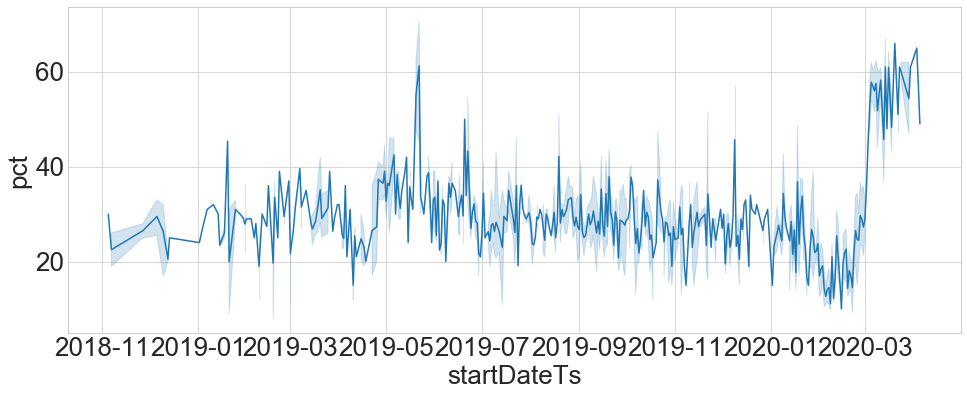

In [16]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=biden["startDateTs"], y=biden["pct"], data=biden)

In [34]:
biden["startDateTs"]

0       2020-04-05
2       2020-04-03
4       2020-03-30
6       2020-03-29
8       2020-03-29
           ...    
18560   2018-11-27
18568   2018-11-27
18608   2018-11-07
18610   2018-11-07
18631   2018-11-05
Name: startDateTs, Length: 1267, dtype: datetime64[ns]

In [38]:
biden.pollster.unique()

array(['YouGov', 'SSRS', 'Morning Consult', 'IBD/TIPP',
       'Harris Insights & Analytics', 'Marquette University Law School',
       'ABC News/Washington Post', 'Echelon Insights', 'Ipsos',
       'Lord Ashcroft Polls', 'Emerson College', 'Swayable', 'AtlasIntel',
       'Marist College', 'Monmouth University', 'University of Georgia',
       'Point Blank Political', 'NBC News/Wall Street Journal',
       'Gravis Marketing', 'Latino Decisions', 'ROI Rocket',
       'Hofstra University', 'Sacred Heart University',
       'Public Policy Polling', 'University of North Florida',
       'Chism Strategies', 'Data for Progress', 'Optimus',
       'Victory Research', 'Mitchell Research & Communications',
       'Ogden & Fry', 'Target Insyght', 'Concord Public Opinion Partners',
       'St. Pete Polls', 'Quinnipiac University',
       'Florida Atlantic University', 'SurveyUSA', 'EPIC-MRA',
       'Remington Research Group', 'OH Predictive Insights/MBQF',
       'Change Research', 'Spry Strat

In [17]:
bidenYouGov = biden[biden["pollster"] == "YouGov"]

In [18]:
timestamps = list()
for index, row in bidenYouGov.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))

In [19]:
bidenYouGov.insert(2, "start_DateTs", timestamps, True)

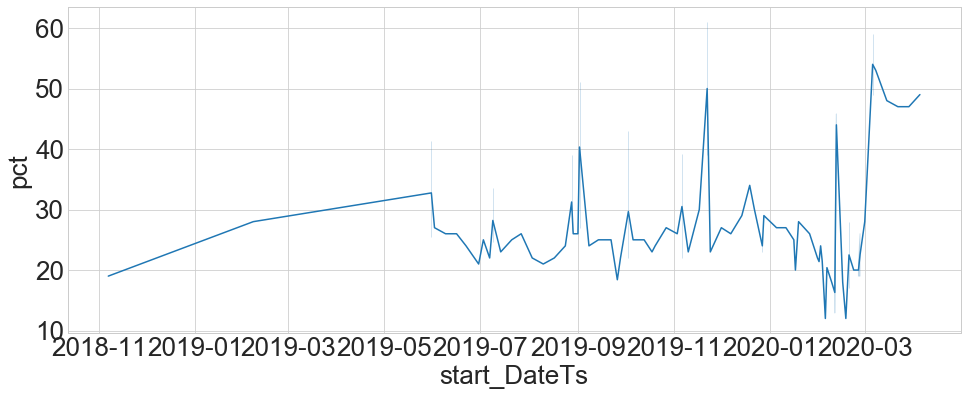

In [20]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenYouGov["start_DateTs"], y=bidenYouGov["pct"], data=bidenYouGov)

In [21]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSurveyUSA = biden[biden["pollster"] == "SurveyUSA"]

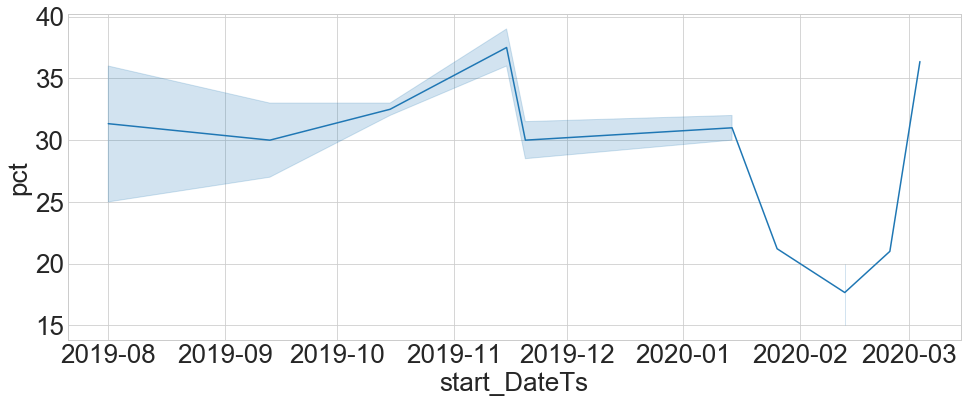

In [22]:
timestamps = list()
for index, row in bidenSurveyUSA.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSurveyUSA.insert(2, "start_DateTs", timestamps, True)
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=bidenSurveyUSA["start_DateTs"], y=bidenSurveyUSA["pct"], data=bidenSurveyUSA)

In [23]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMonmouth = biden[biden["pollster"] == "Monmouth University"]
timestamps = list()
for index, row in bidenMonmouth.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMonmouth.insert(2, "start_DateTs", timestamps, True)

In [24]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [25]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenABC = biden[biden["pollster"] == "ABC News/Washington Post"]
timestamps = list()
for index, row in bidenABC.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenABC.insert(2, "start_DateTs", timestamps, True)

In [26]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSeltzer = biden[biden["pollster"] == "Selzer & Co."]
timestamps = list()
for index, row in bidenSeltzer.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSeltzer.insert(2, "start_DateTs", timestamps, True)

In [27]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenMuhlenberg = biden[biden["pollster"] == "Emerson College"]
timestamps = list()
for index, row in bidenMuhlenberg.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenMuhlenberg.insert(2, "start_DateTs", timestamps, True)

In [28]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
bidenSuffolk = biden[biden["pollster"] == "Suffolk University"]
timestamps = list()
for index, row in bidenSuffolk.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
bidenSuffolk.insert(2, "start_DateTs", timestamps, True)

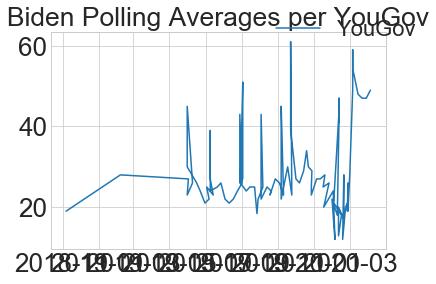

In [29]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(bidenYouGov["start_DateTs"], bidenYouGov["pct"])
#plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
#plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
#plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
#plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
#plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
#plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages per YouGov")
plt.show()

In [30]:
bidenYouGov = bidenYouGov.sort_values("start_DateTs", ascending = True)

In [31]:
bidenYouGov

,question_id,poll_id,start_DateTs,startDateTs,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
18608,92394,57181,2018-11-07,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,...,False,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0
17866,93245,57557,2019-02-07,2019-02-07,2020,New Hampshire,568,YouGov,278,UMass Amherst,...,False,2/20/19 14:16,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0
14877,98023,58471,2019-05-31,2019-05-31,2020,Texas,568,YouGov,"216,406",Texas Tribune | University of Texas,...,False,6/17/19 08:18,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0
14621,98018,58468,2019-05-31,2019-05-31,2020,Iowa,568,YouGov,133,CBS News,...,False,6/16/19 09:54,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0
14669,98020,58470,2019-05-31,2019-05-31,2020,South Carolina,568,YouGov,133,CBS News,...,False,6/16/19 09:54,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020,NaN,568,YouGov,352,Economist,...,False,3/11/20 09:13,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0
42,120147,64872,2020-03-15,2020-03-15,2020,NaN,568,YouGov,352,Economist,...,False,3/18/20 09:40,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0
22,120488,64980,2020-03-22,2020-03-22,2020,NaN,568,YouGov,352,Economist,...,False,3/25/20 09:08,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0
8,120693,65045,2020-03-29,2020-03-29,2020,NaN,568,YouGov,352,Economist,...,False,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0


### Removing outliers from YouGov data

In [32]:
bidenYouGov

,question_id,poll_id,start_DateTs,startDateTs,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
18608,92394,57181,2018-11-07,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,...,False,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0
17866,93245,57557,2019-02-07,2019-02-07,2020,New Hampshire,568,YouGov,278,UMass Amherst,...,False,2/20/19 14:16,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0
14877,98023,58471,2019-05-31,2019-05-31,2020,Texas,568,YouGov,"216,406",Texas Tribune | University of Texas,...,False,6/17/19 08:18,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0
14621,98018,58468,2019-05-31,2019-05-31,2020,Iowa,568,YouGov,133,CBS News,...,False,6/16/19 09:54,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0
14669,98020,58470,2019-05-31,2019-05-31,2020,South Carolina,568,YouGov,133,CBS News,...,False,6/16/19 09:54,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020,NaN,568,YouGov,352,Economist,...,False,3/11/20 09:13,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0
42,120147,64872,2020-03-15,2020-03-15,2020,NaN,568,YouGov,352,Economist,...,False,3/18/20 09:40,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0
22,120488,64980,2020-03-22,2020-03-22,2020,NaN,568,YouGov,352,Economist,...,False,3/25/20 09:08,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0
8,120693,65045,2020-03-29,2020-03-29,2020,NaN,568,YouGov,352,Economist,...,False,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0


In [33]:
rowsToDrop = list()
changes = list()
for i in range(0, len(bidenYouGov)-1) : 
    change = abs(bidenYouGov.iloc[i+1, 37] - bidenYouGov.iloc[i, 37])
    changes.append(change)
    if(change >= 10):
        rowsToDrop.append(i)
changes.sort(reverse=True)
print(changes)
noExtremities = bidenYouGov.reset_index().drop(rowsToDrop)

IndexError: single positional indexer is out-of-bounds

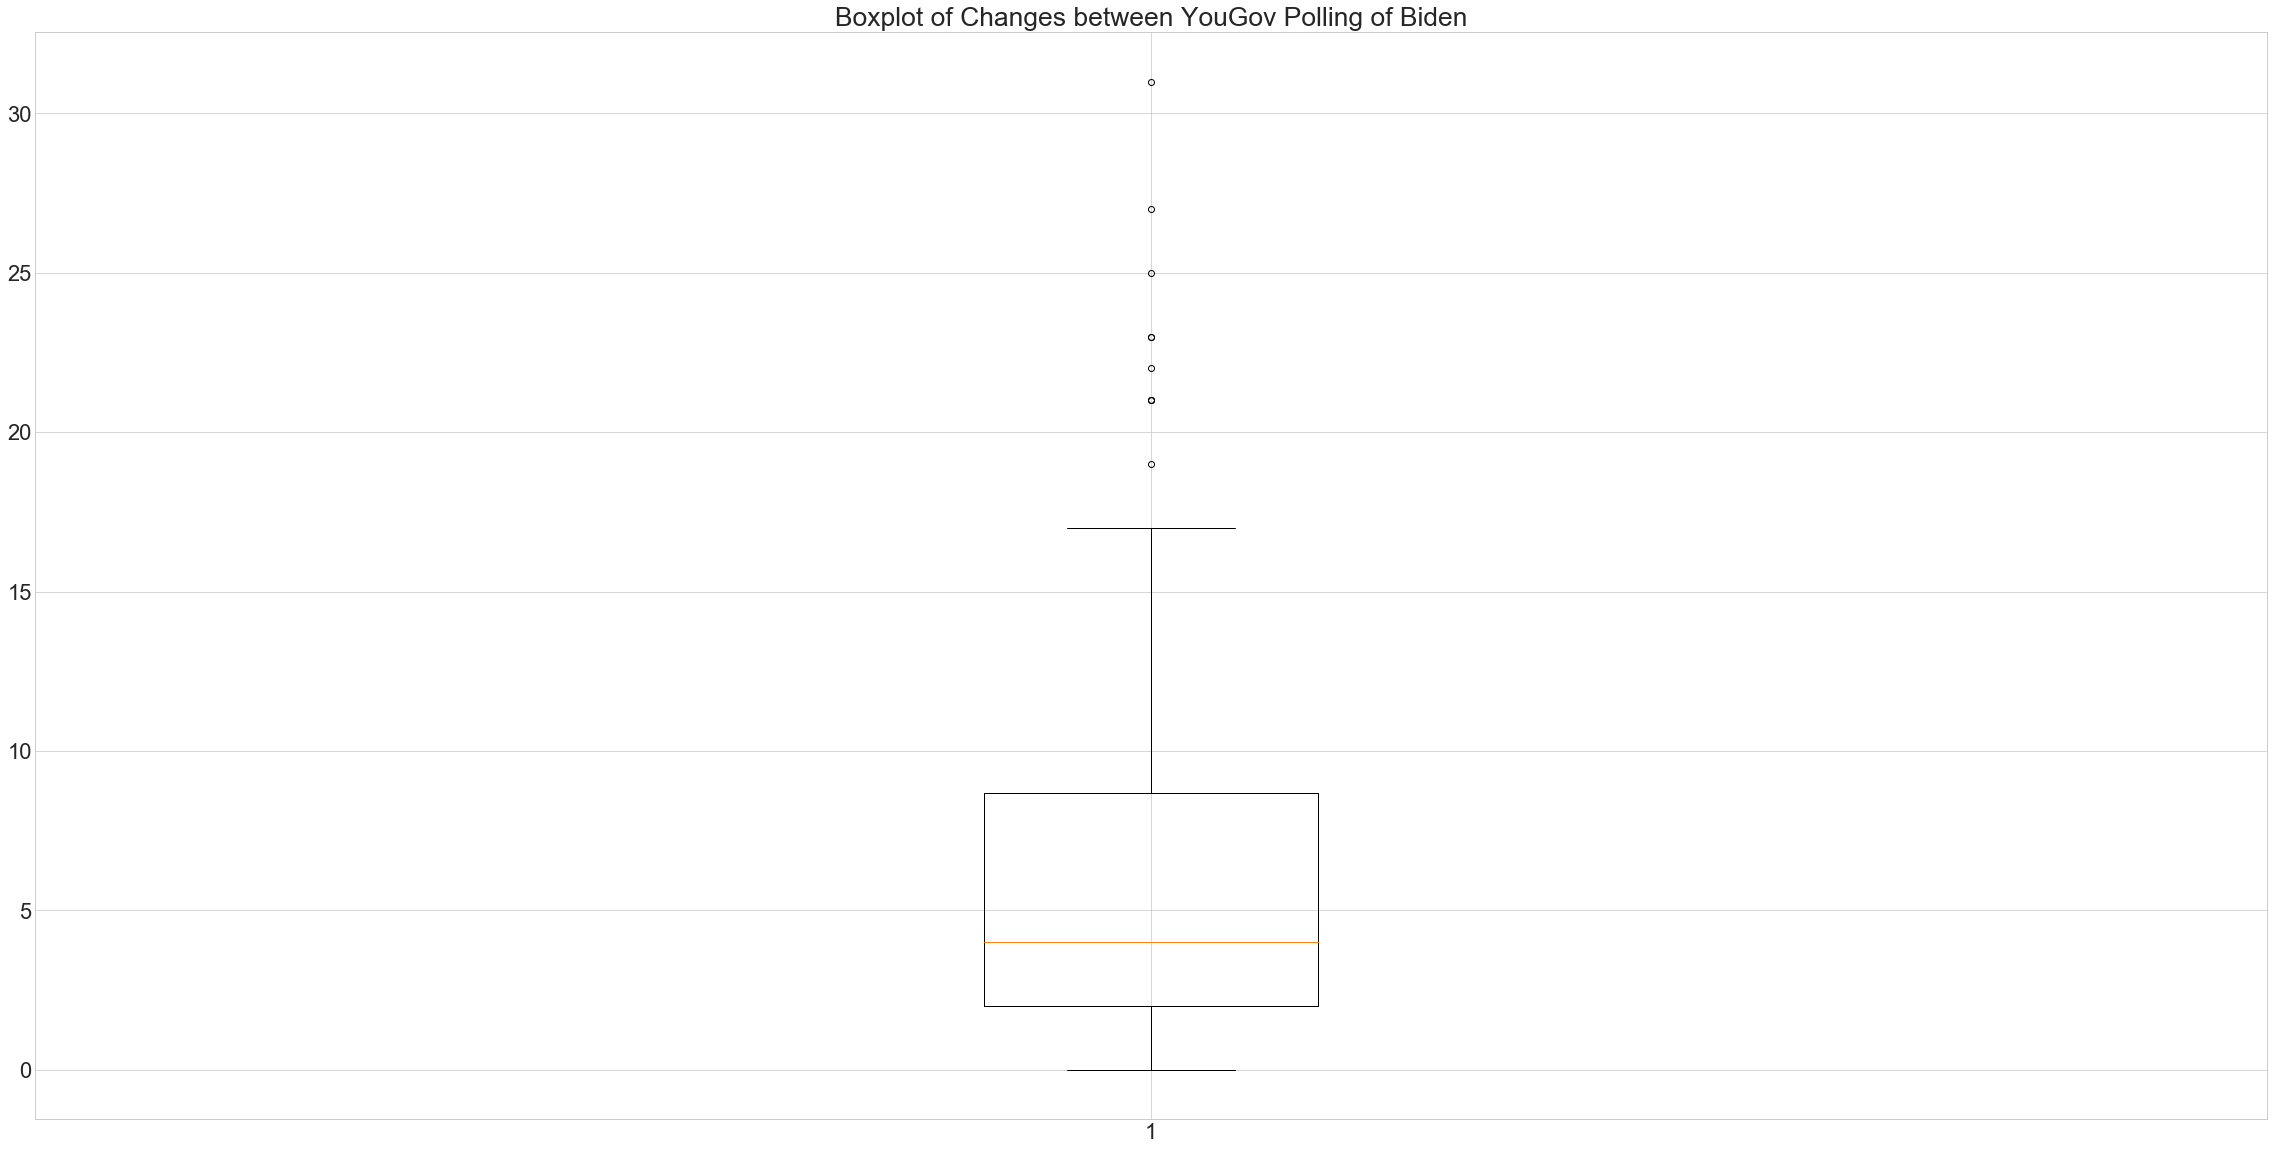

In [171]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Changes between YouGov Polling of Biden')
ax1.boxplot(changes)
plt.show()

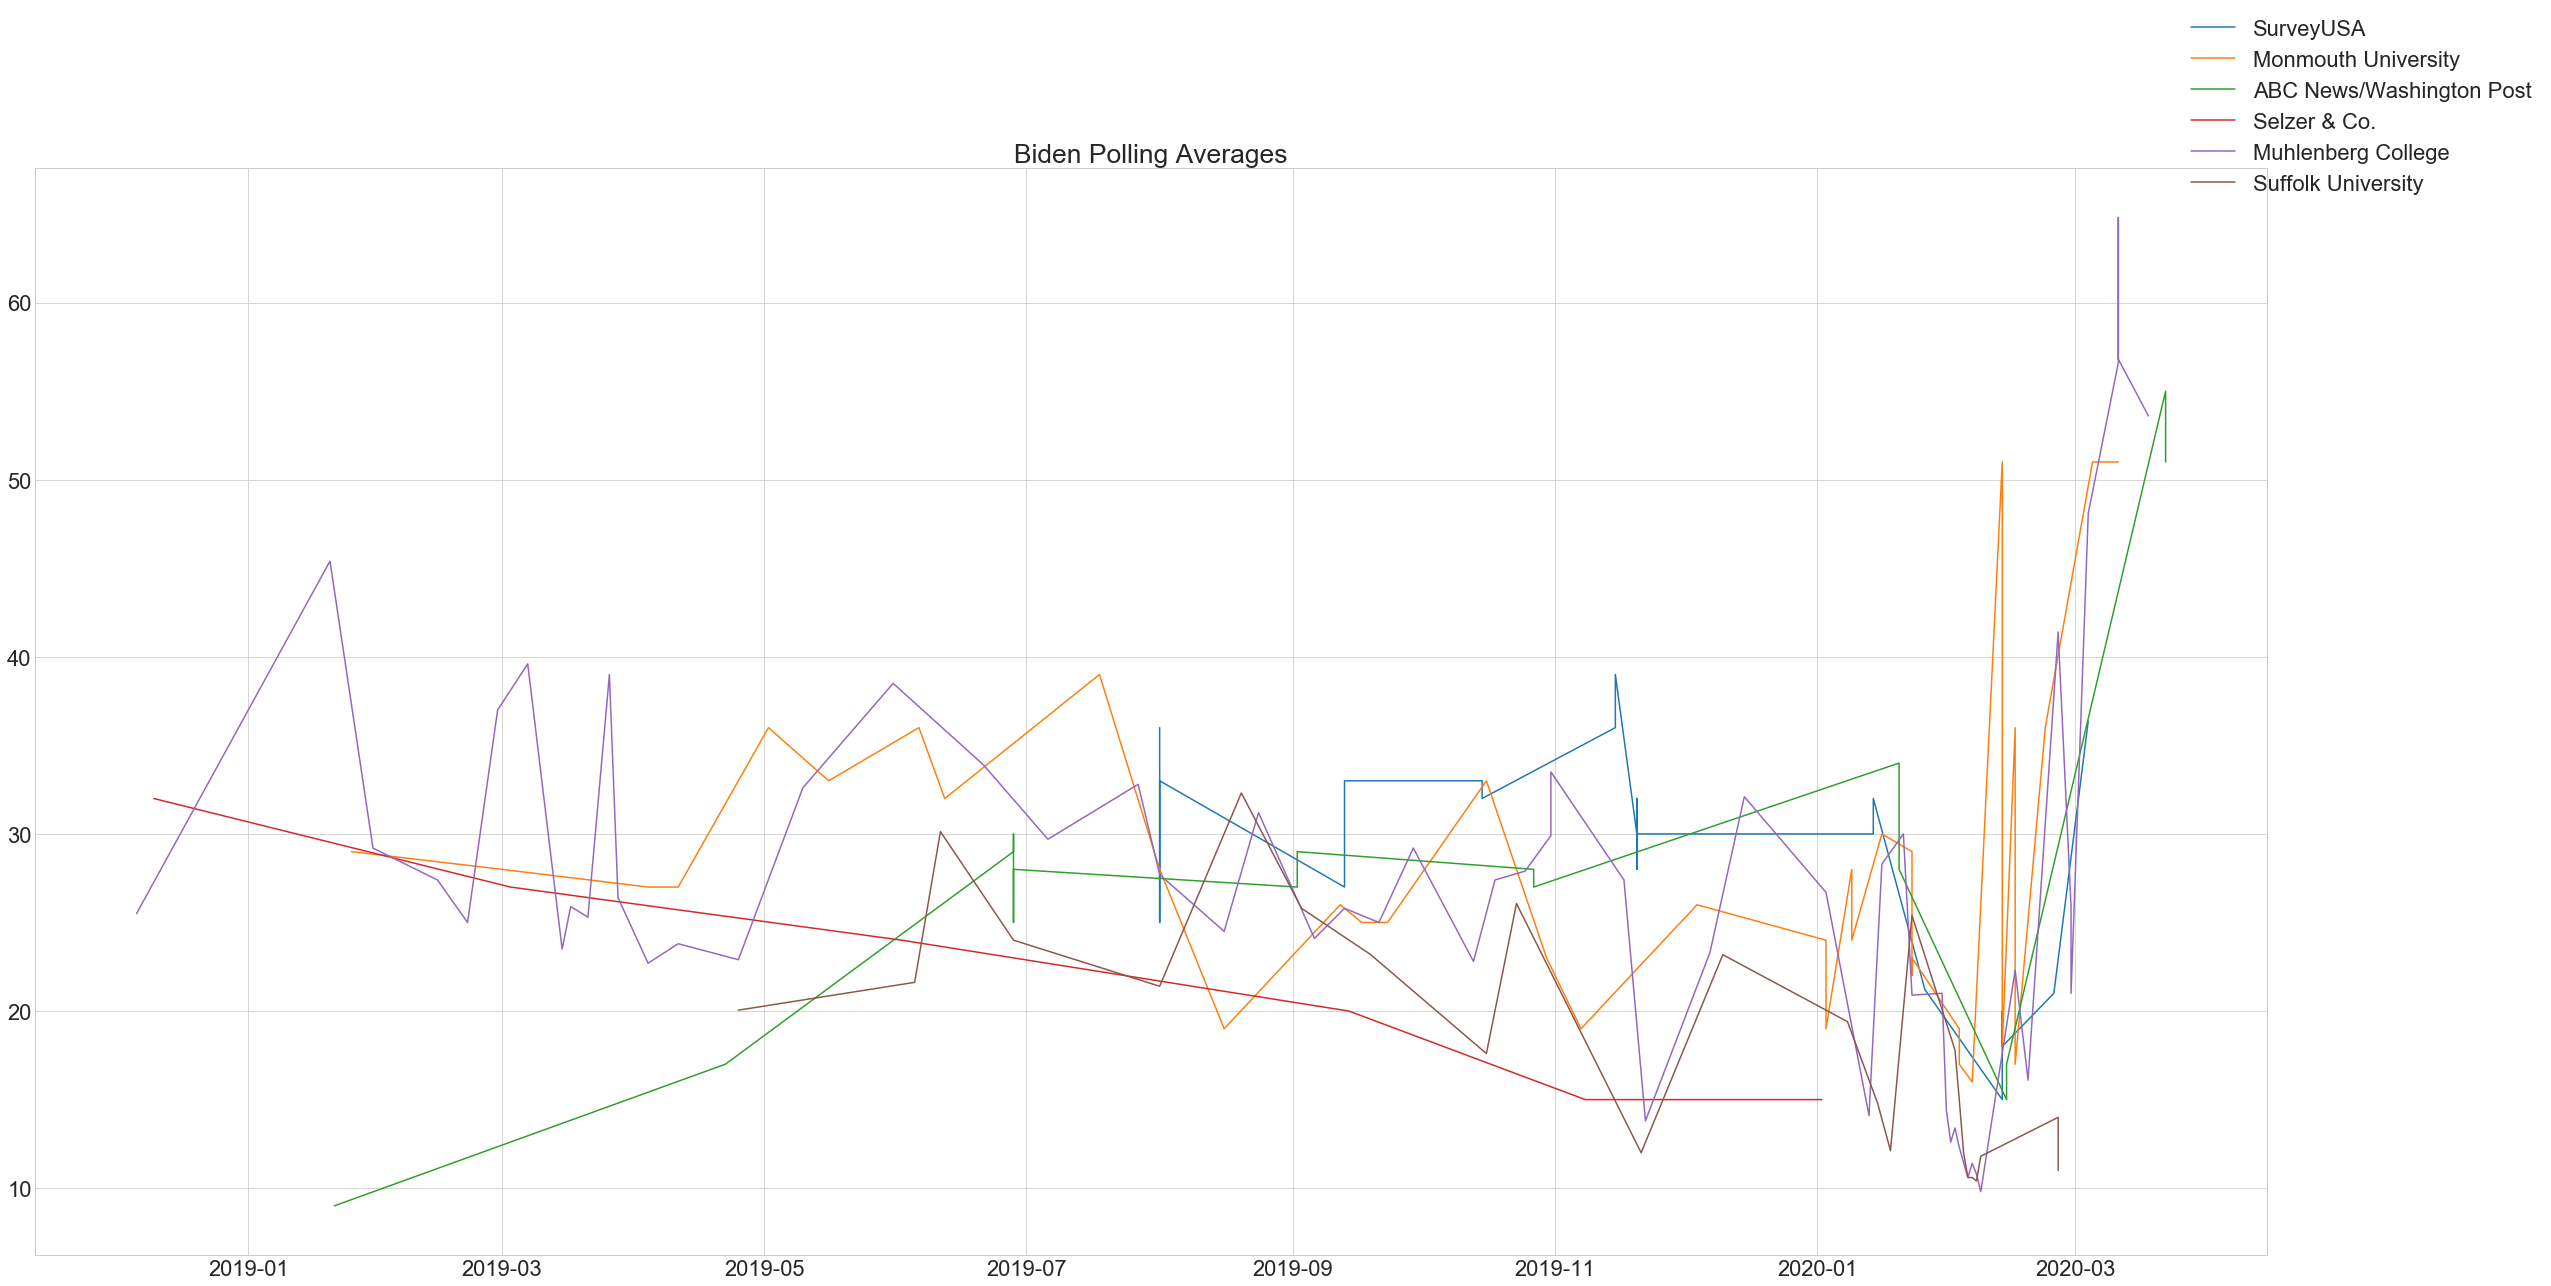

In [25]:
fig = plt.figure()
#plt.plot(noExtremities["start_DateTs"], noExtremities["pct"])
plt.plot(bidenSurveyUSA["start_DateTs"], bidenSurveyUSA["pct"])
plt.plot(bidenMonmouth["start_DateTs"], bidenMonmouth["pct"])
plt.plot(bidenABC["start_DateTs"], bidenABC["pct"])
plt.plot(bidenSeltzer["start_DateTs"], bidenSeltzer["pct"])
plt.plot(bidenMuhlenberg["start_DateTs"], bidenMuhlenberg["pct"])
plt.plot(bidenSuffolk["start_DateTs"], bidenSuffolk["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages")
plt.show()

In [145]:
noExtremities

,question_id,poll_id,start_DateTs,start_DateTsioi,startDateTssdf,startDateTsbad,start_date_tsbad,cycle,state,pollster_id,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,start_date_ts
18608,92394,57181,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2018-11-07,2020,Massachusetts,568,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.,2018-11-07
17866,93245,57557,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2019-02-07,2020,New Hampshire,568,...,NaN,https://www.umass.edu/newsoffice/article/presi...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.,2019-02-07
14669,98020,58470,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,South Carolina,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVN...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,45.0,Joseph R. Biden Jr.,2019-05-31
14621,98018,58468,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Iowa,568,...,NaN,https://drive.google.com/file/d/0ByVu4fDHYJgVS...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.,2019-05-31
14877,98023,58471,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020,Texas,568,...,NaN,https://www.texastribune.org/2019/06/17/trump-...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,23.0,Joseph R. Biden Jr.,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,119899,64794,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020-03-08,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/vrbl9mmctz/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,53.0,Joseph R. Biden Jr.,2020-03-08
42,120147,64872,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020-03-15,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/fcdckgt368/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,48.0,Joseph R. Biden Jr.,2020-03-15
22,120488,64980,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020-03-22,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/bfiid7tfh3/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-22
8,120693,65045,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020-03-29,2020,NaN,568,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.,2020-03-29


### Biden Rolling Average

In [173]:
biden

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [174]:
biden.columns

Index(['question_id', 'poll_id', 'cycle', 'state', 'pollster_id', 'pollster',
       'sponsor_ids', 'sponsors', 'display_name', 'pollster_rating_id',
       'pollster_rating_name', 'fte_grade', 'sample_size', 'population',
       'population_full', 'methodology', 'office_type', 'start_date',
       'end_date', 'sponsor_candidate', 'internal', 'partisan', 'tracking',
       'nationwide_batch', 'created_at', 'notes', 'url', 'stage', 'party',
       'answer', 'candidate_id', 'candidate_name', 'pct', 'candiate_name'],
      dtype='object')

In [34]:
biden = fte[fte["candidate_name"] == "Joseph R. Biden Jr."]
timestamps = list()
for index, row in biden.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
biden.insert(2, "start_date_ts", timestamps, True)

In [176]:
biden

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020-04-05,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
2,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
4,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
6,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
8,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18560,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
18568,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18608,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18610,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.


In [35]:
biden = biden.sort_values("start_date_ts", ascending = True)

In [178]:
biden

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
18631,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,30.0,Joseph R. Biden Jr.
18610,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,26.0,Joseph R. Biden Jr.
18608,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,19.0,Joseph R. Biden Jr.
18568,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,28.0,Joseph R. Biden Jr.
18560,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,25.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,47.0,Joseph R. Biden Jr.
6,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,62.0,Joseph R. Biden Jr.
4,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
2,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.


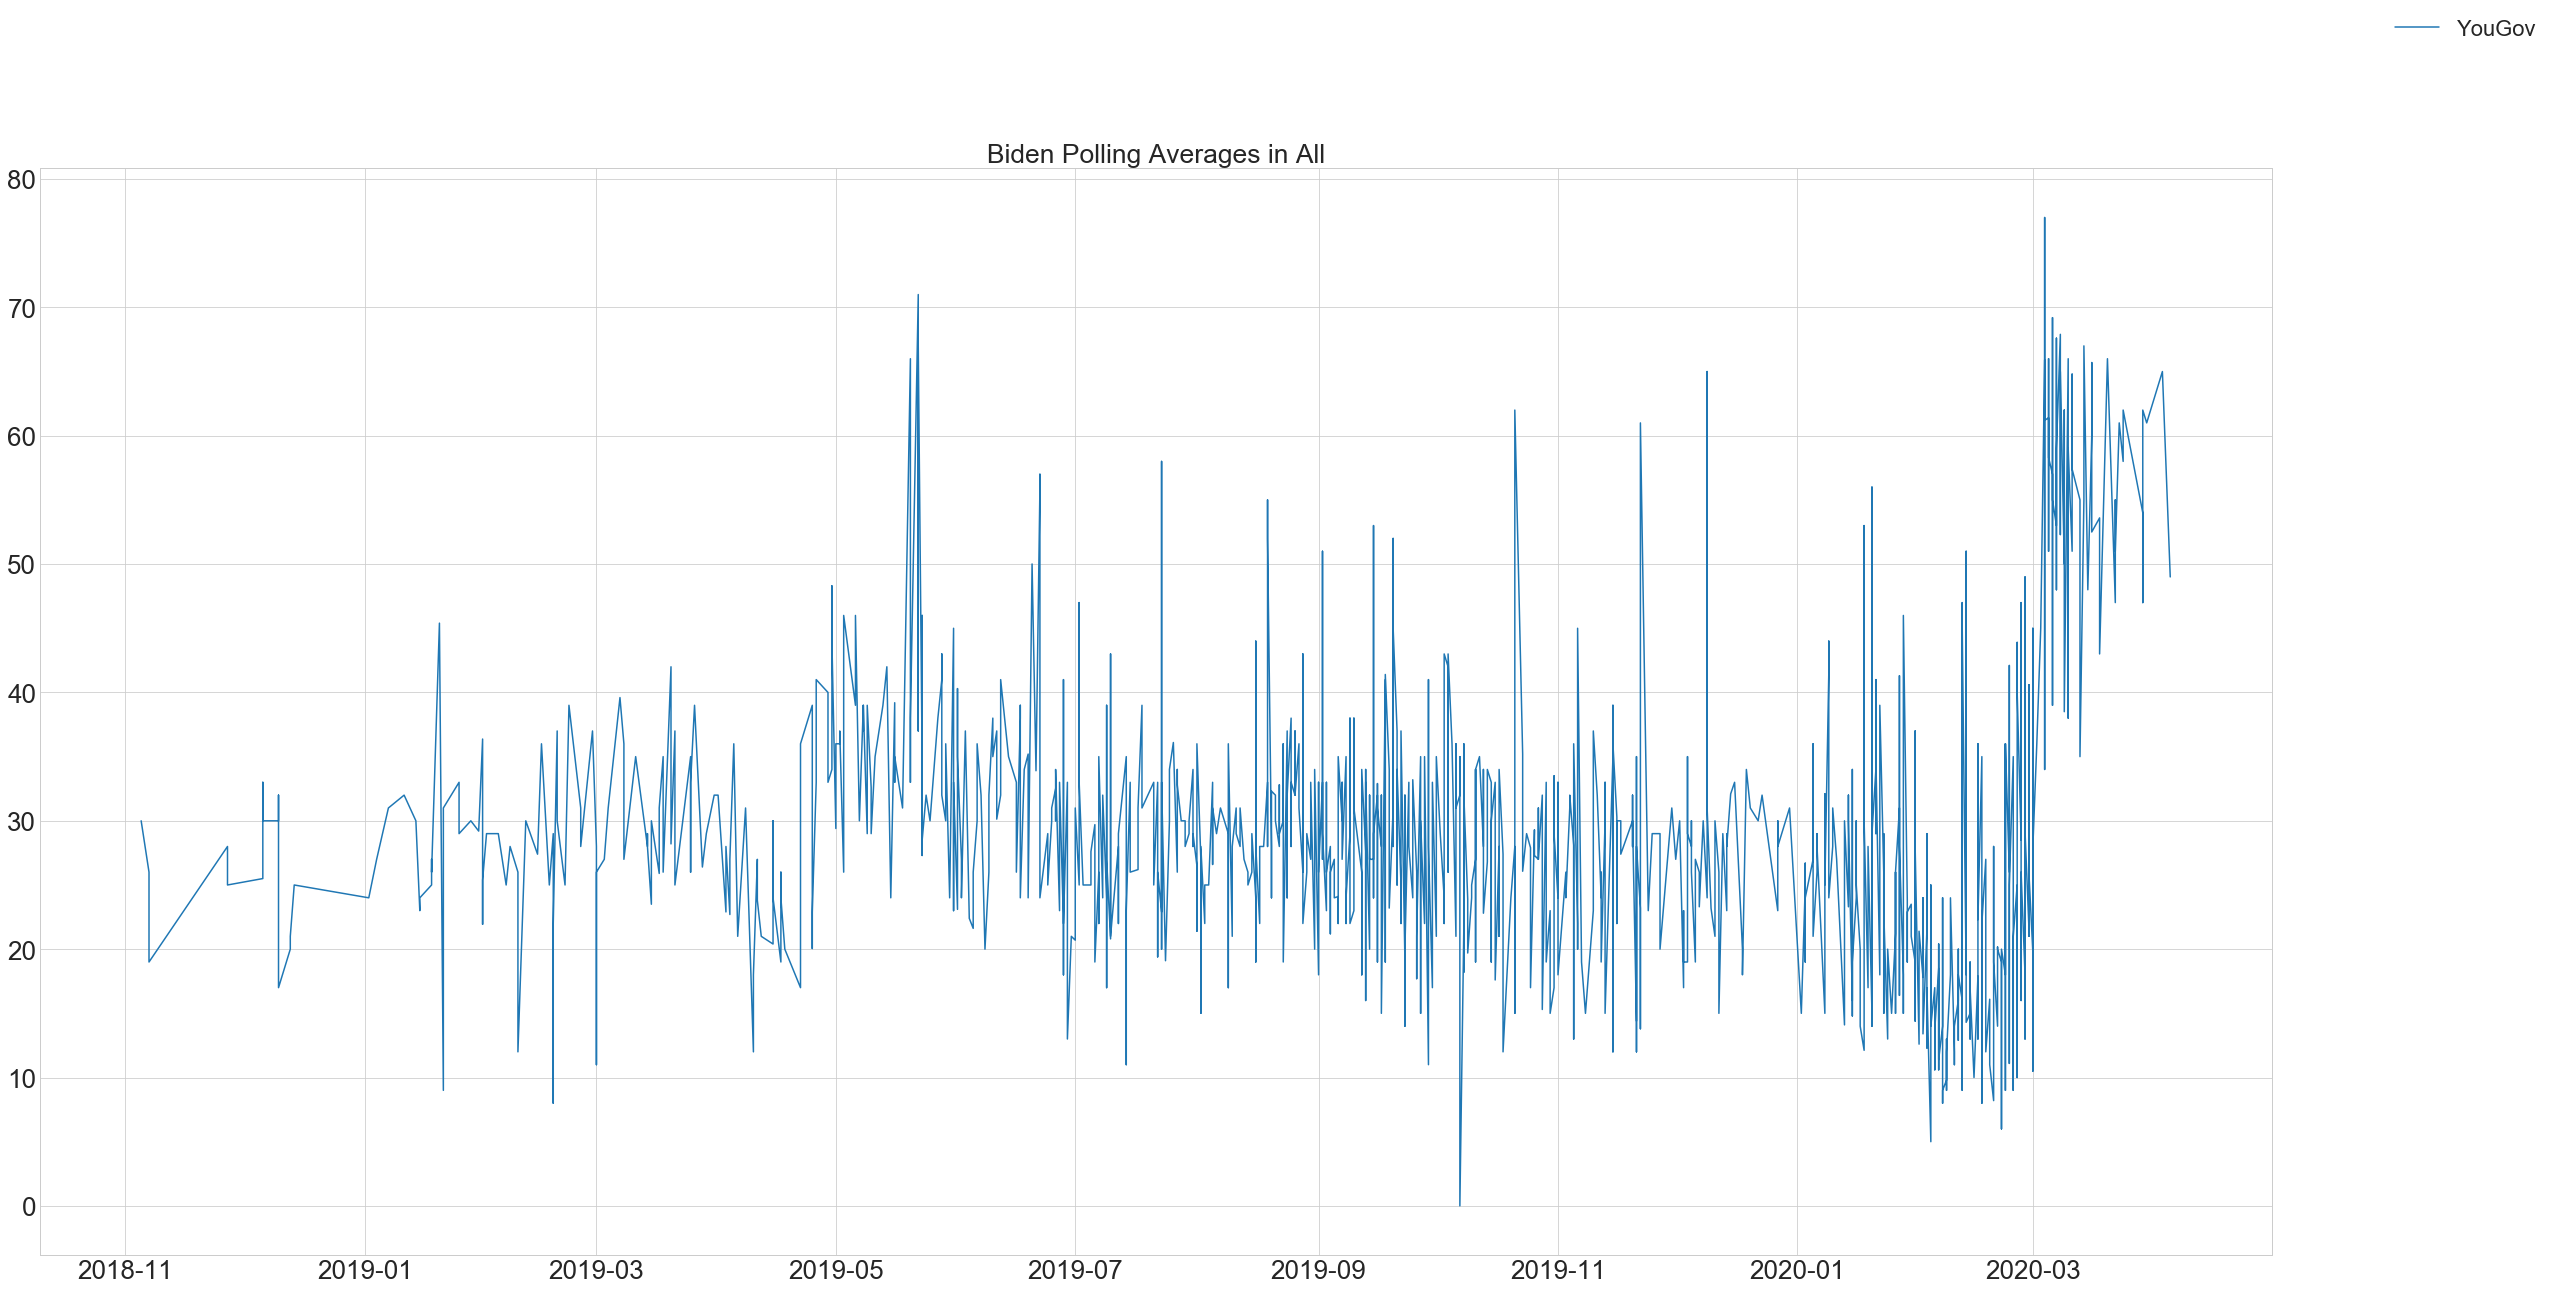

In [179]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Polling Averages in All")
plt.show()

In [36]:
biden.set_index("start_date_ts", inplace = True)

In [37]:
rolling = biden.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
biden["rolling_mean"] = rolling_mean["pct"]

                question_id       poll_id   cycle  pollster_id  \
start_date_ts                                                    
2018-11-05              NaN           NaN     NaN          NaN   
2018-11-07              NaN           NaN     NaN          NaN   
2018-11-07     92393.000000  57072.666667  2020.0  1057.666667   
2018-11-27     92394.333333  57013.666667  2020.0  1088.333333   
2018-11-27     92395.000000  57065.000000  2020.0  1194.666667   
2018-12-06     92396.000000  57029.666667  2020.0  1372.666667   
2018-12-06     93025.000000  57048.666667  2020.0  1323.666667   
2018-12-06     93026.000000  57067.666667  2020.0  1274.666667   
2018-12-10     93027.000000  57104.666667  2020.0  1319.666667   
2018-12-10     92399.000000  57145.000000  2020.0  1011.666667   

               pollster_rating_id  sample_size  internal  tracking  \
start_date_ts                                                        
2018-11-05                    NaN          NaN       NaN       NaN 

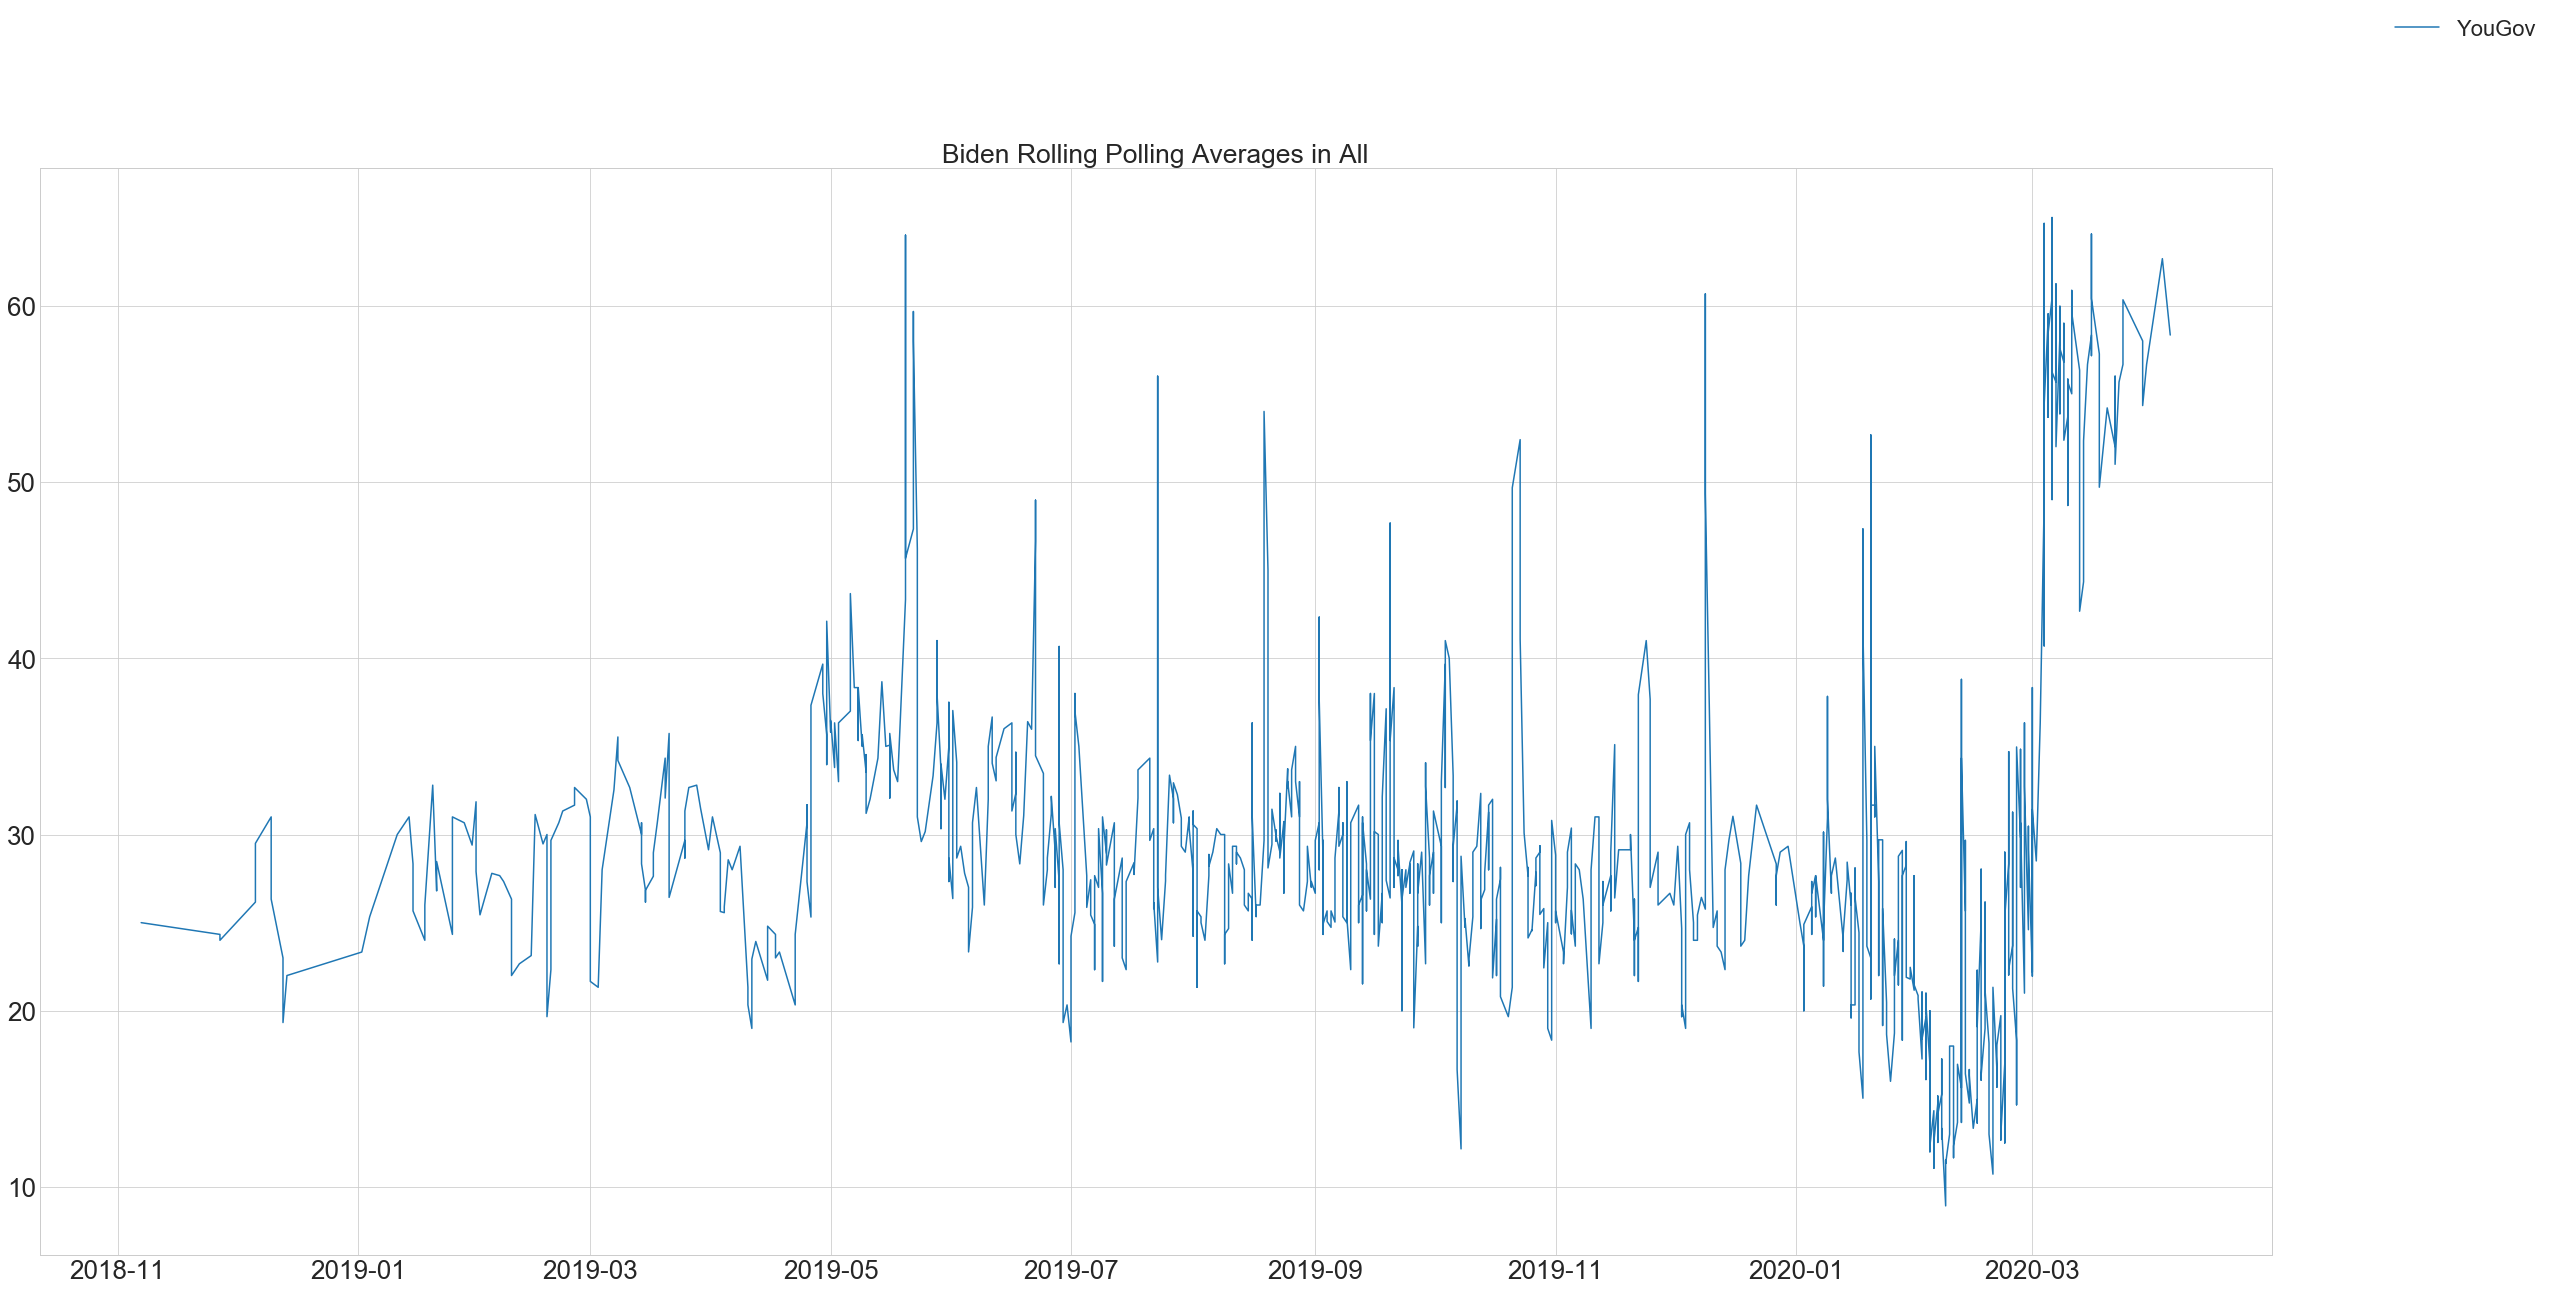

In [38]:
biden = biden.reset_index()
biden

fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["rolling_mean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Rolling Polling Averages in All")
plt.show()

In [196]:
fte

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
0,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,49.0,Joseph R. Biden Jr.
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0,Joseph R. Biden Jr.
2,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,65.0,Joseph R. Biden Jr.
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.
4,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Biden,13256,Joseph R. Biden Jr.,61.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.
18633,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Booker,13287,Cory A. Booker,5.0,Joseph R. Biden Jr.
18634,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Harris,13288,Kamala D. Harris,5.0,Joseph R. Biden Jr.
18635,92392,57184,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,133.0,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Bloomberg,13289,Michael Bloomberg,5.0,Joseph R. Biden Jr.


In [206]:
sanders = fte[fte["candidate_name"] == "Bernard Sanders"]
timestamps = list()
for index, row in sanders.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
sanders.insert(2, "start_date_ts", timestamps, True)
sanders = sanders.sort_values("start_date_ts", ascending = True)

In [207]:
sanders

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name
18632,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,960,Hill.TV,HarrisX,...,12/27/18 03:50,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.
18611,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0,Joseph R. Biden Jr.
18607,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0,Joseph R. Biden Jr.
18567,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0,Joseph R. Biden Jr.
18559,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0,Joseph R. Biden Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0,Joseph R. Biden Jr.
7,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.
5,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0,Joseph R. Biden Jr.
3,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.


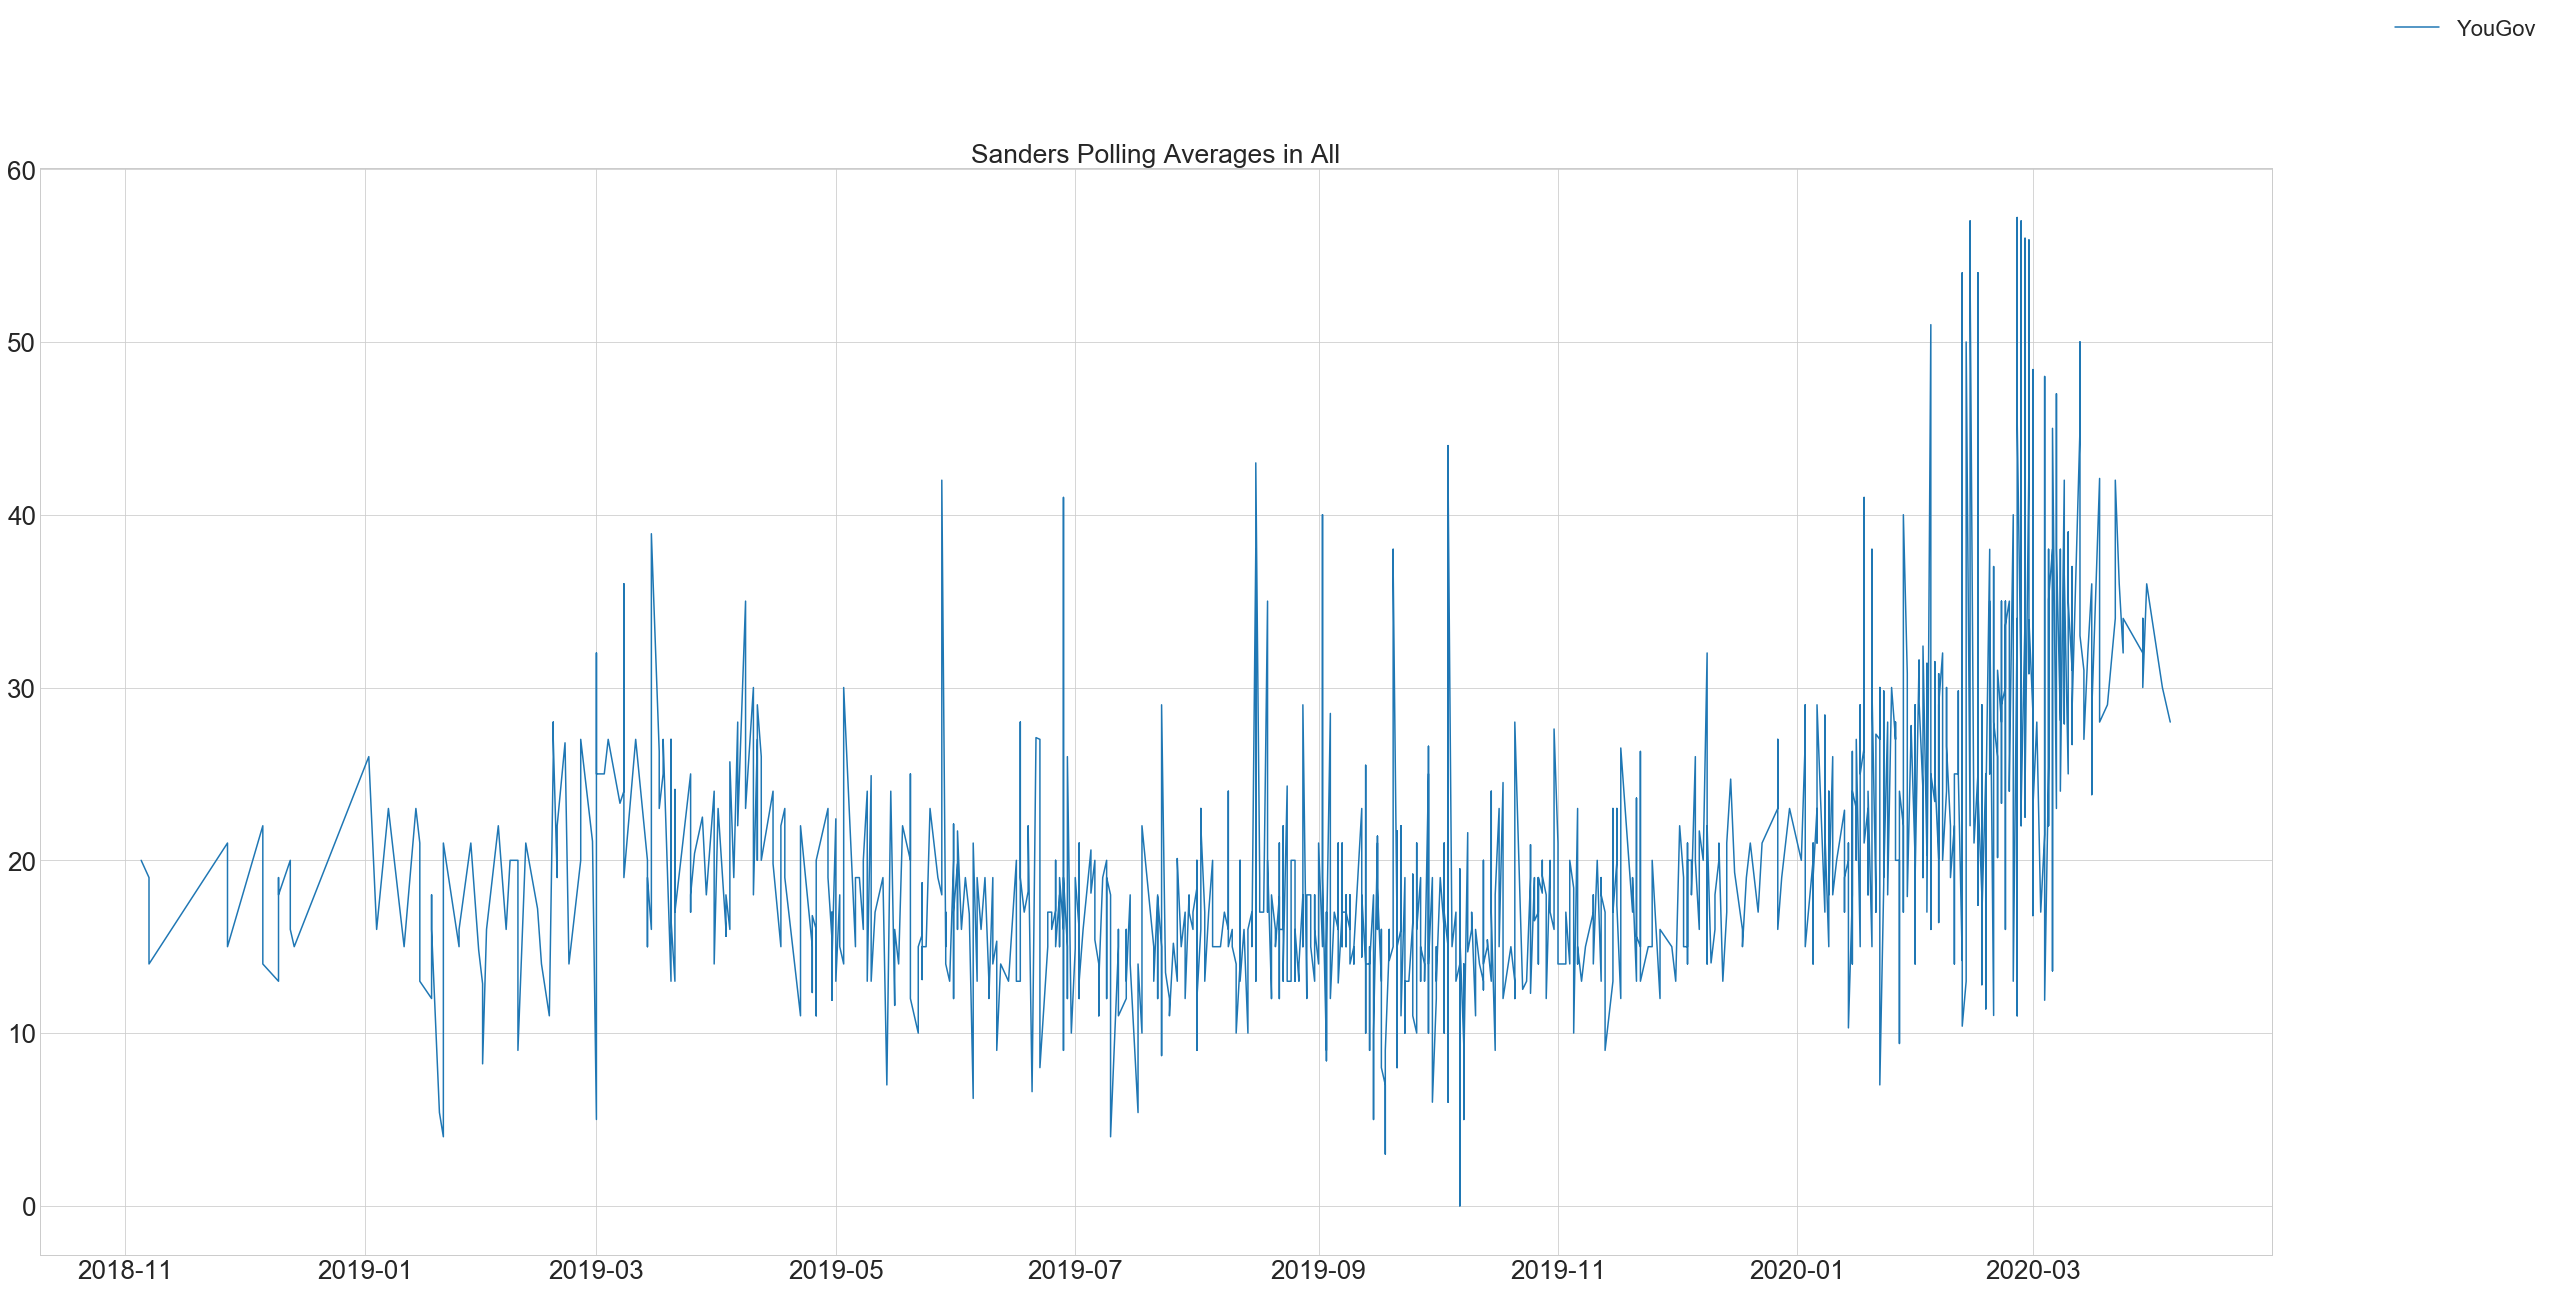

In [208]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(sanders["start_date_ts"], sanders["pct"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Sanders Polling Averages in All")
plt.show()

In [203]:
fte.candidate_name.unique()

array(['Joseph R. Biden Jr.', 'Bernard Sanders', 'Tulsi Gabbard',
       'Elizabeth Warren', 'Michael Bloomberg', 'Pete Buttigieg',
       'Amy Klobuchar', 'Donald Trump', 'William F. Weld', 'Tom Steyer',
       'Andrew Yang', 'Roque De La Fuente', 'Michael F. Bennet',
       'Cory A. Booker', 'Julián Castro', 'John K. Delaney', 'Joe Sestak',
       'Marianne Williamson', 'Joe Walsh', 'Deval Patrick', 'Mosie Boyd',
       'Michael Ellinger', 'Mark Stewart Greenstein', 'Mike Pence',
       'Kamala D. Harris', 'Robert Wells', 'Nathan Bloxham',
       "Beto O'Rourke", 'Steve Bullock', 'Wayne Messam',
       'Kirsten E. Gillibrand', 'Mike Gravel', 'Eric Swalwell',
       'Tim Ryan', 'Hillary Rodham Clinton', 'Bill de Blasio',
       'Jay Robert Inslee', 'John Kerry', 'Mark Sanford',
       'John Hickenlooper', 'Mitt Romney', 'John Richard Kasich',
       'Michelle Obama', 'Seth Moulton', 'Terry R. McAuliffe',
       'Nimrata R. Haley', 'Stacey Yvonne Abrams', 'Bob Corker',
       'Marco Ru

In [209]:
sandersIndexChange = sanders.set_index("start_date_ts")

In [219]:
rolling = sandersIndexChange.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean["pct"])
rolling_mean = rolling_mean.reset_index()
sanders = sanders.reset_index()
sanders.insert(2, "rollingMean", rolling_mean["pct"], True)

start_date_ts
2018-11-05          NaN
2018-11-07          NaN
2018-11-07    17.666667
2018-11-27    18.000000
2018-11-27    16.666667
                ...    
2020-03-29    33.333333
2020-03-29    32.000000
2020-03-30    33.333333
2020-04-03    32.000000
2020-04-05    31.333333
Name: pct, Length: 1271, dtype: float64


In [220]:
sanders

,level_0,index,rollingMean,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,...,notes,url,stage,party,answer,candidate_id,candidate_name,pct,candiate_name,rolling_mean
0,0,18632,NaN,92392,57184,2018-11-05,2020,NaN,1416,Harris Insights & Analytics,...,NaN,https://thehill.com/hilltv/what-americas-think...,primary,DEM,Sanders,13257,Bernard Sanders,20.0,Joseph R. Biden Jr.,21.2514
1,1,18611,NaN,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,...,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0,Joseph R. Biden Jr.,21.2514
2,2,18607,17.666667,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,...,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0,Joseph R. Biden Jr.,21.2514
3,3,18567,18.000000,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,...,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0,Joseph R. Biden Jr.,21.2514
4,4,18559,16.666667,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,...,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0,Joseph R. Biden Jr.,21.2514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,1266,9,33.333333,120693,65045,2020-03-29,2020,NaN,568,YouGov,...,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0,Joseph R. Biden Jr.,21.2514
1267,1267,7,32.000000,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,...,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.,21.2514
1268,1268,5,33.333333,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,...,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0,Joseph R. Biden Jr.,21.2514
1269,1269,3,32.000000,121424,65687,2020-04-03,2020,NaN,1361,SSRS,...,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0,Joseph R. Biden Jr.,21.2514


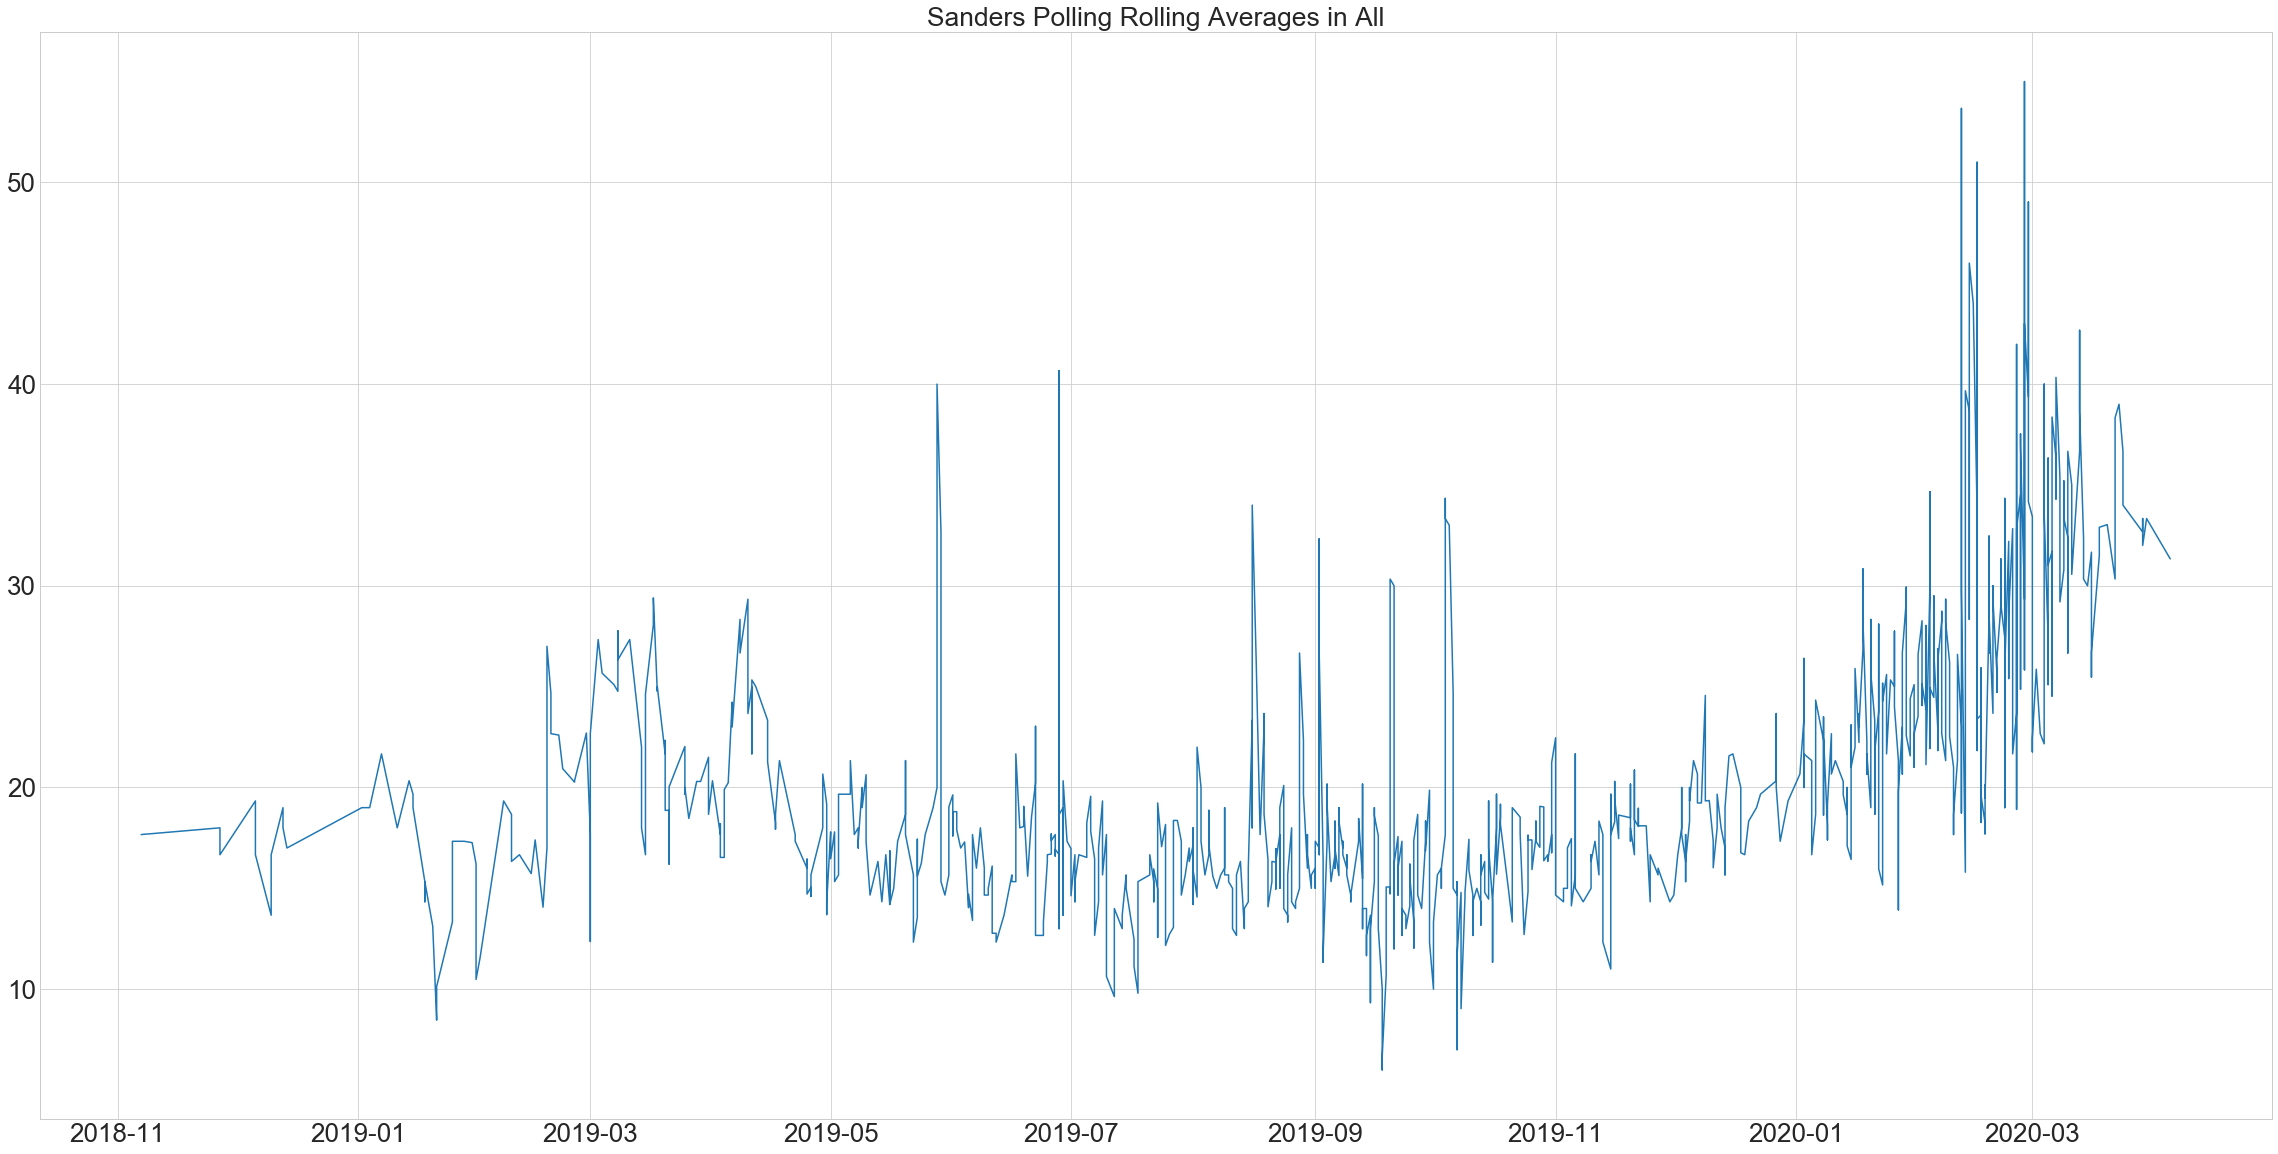

In [223]:
fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(sanders["start_date_ts"], sanders["rollingMean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
#fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Sanders Polling Rolling Averages in All")
plt.show()

In [226]:
biden.set_index("start_date_ts", inplace = True)

In [6]:
rolling = biden.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
biden["rolling_mean"] = rolling_mean["pct"]

      question_id       poll_id   cycle  pollster_id  pollster_rating_id  \
0             NaN           NaN     NaN          NaN                 NaN   
2             NaN           NaN     NaN          NaN                 NaN   
4   121393.666667  65687.000000  2020.0  1039.333333          302.000000   
6   121384.333333  65683.333333  2020.0   926.000000          219.666667   
8   121140.666667  65469.333333  2020.0   661.666667          251.000000   
10  120900.333333  65253.000000  2020.0   737.333333          222.666667   
12  120679.666667  65043.000000  2020.0  1019.666667          239.666667   
14  120664.666667  65039.666667  2020.0  1226.666667          182.000000   
16  120646.333333  65034.666667  2020.0  1257.333333          182.000000   
18  120604.666667  65018.333333  2020.0   902.666667          118.000000   

    sample_size  internal  tracking  nationwide_batch  candidate_id        pct  
0           NaN       NaN       NaN               NaN           NaN        NaN  
2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


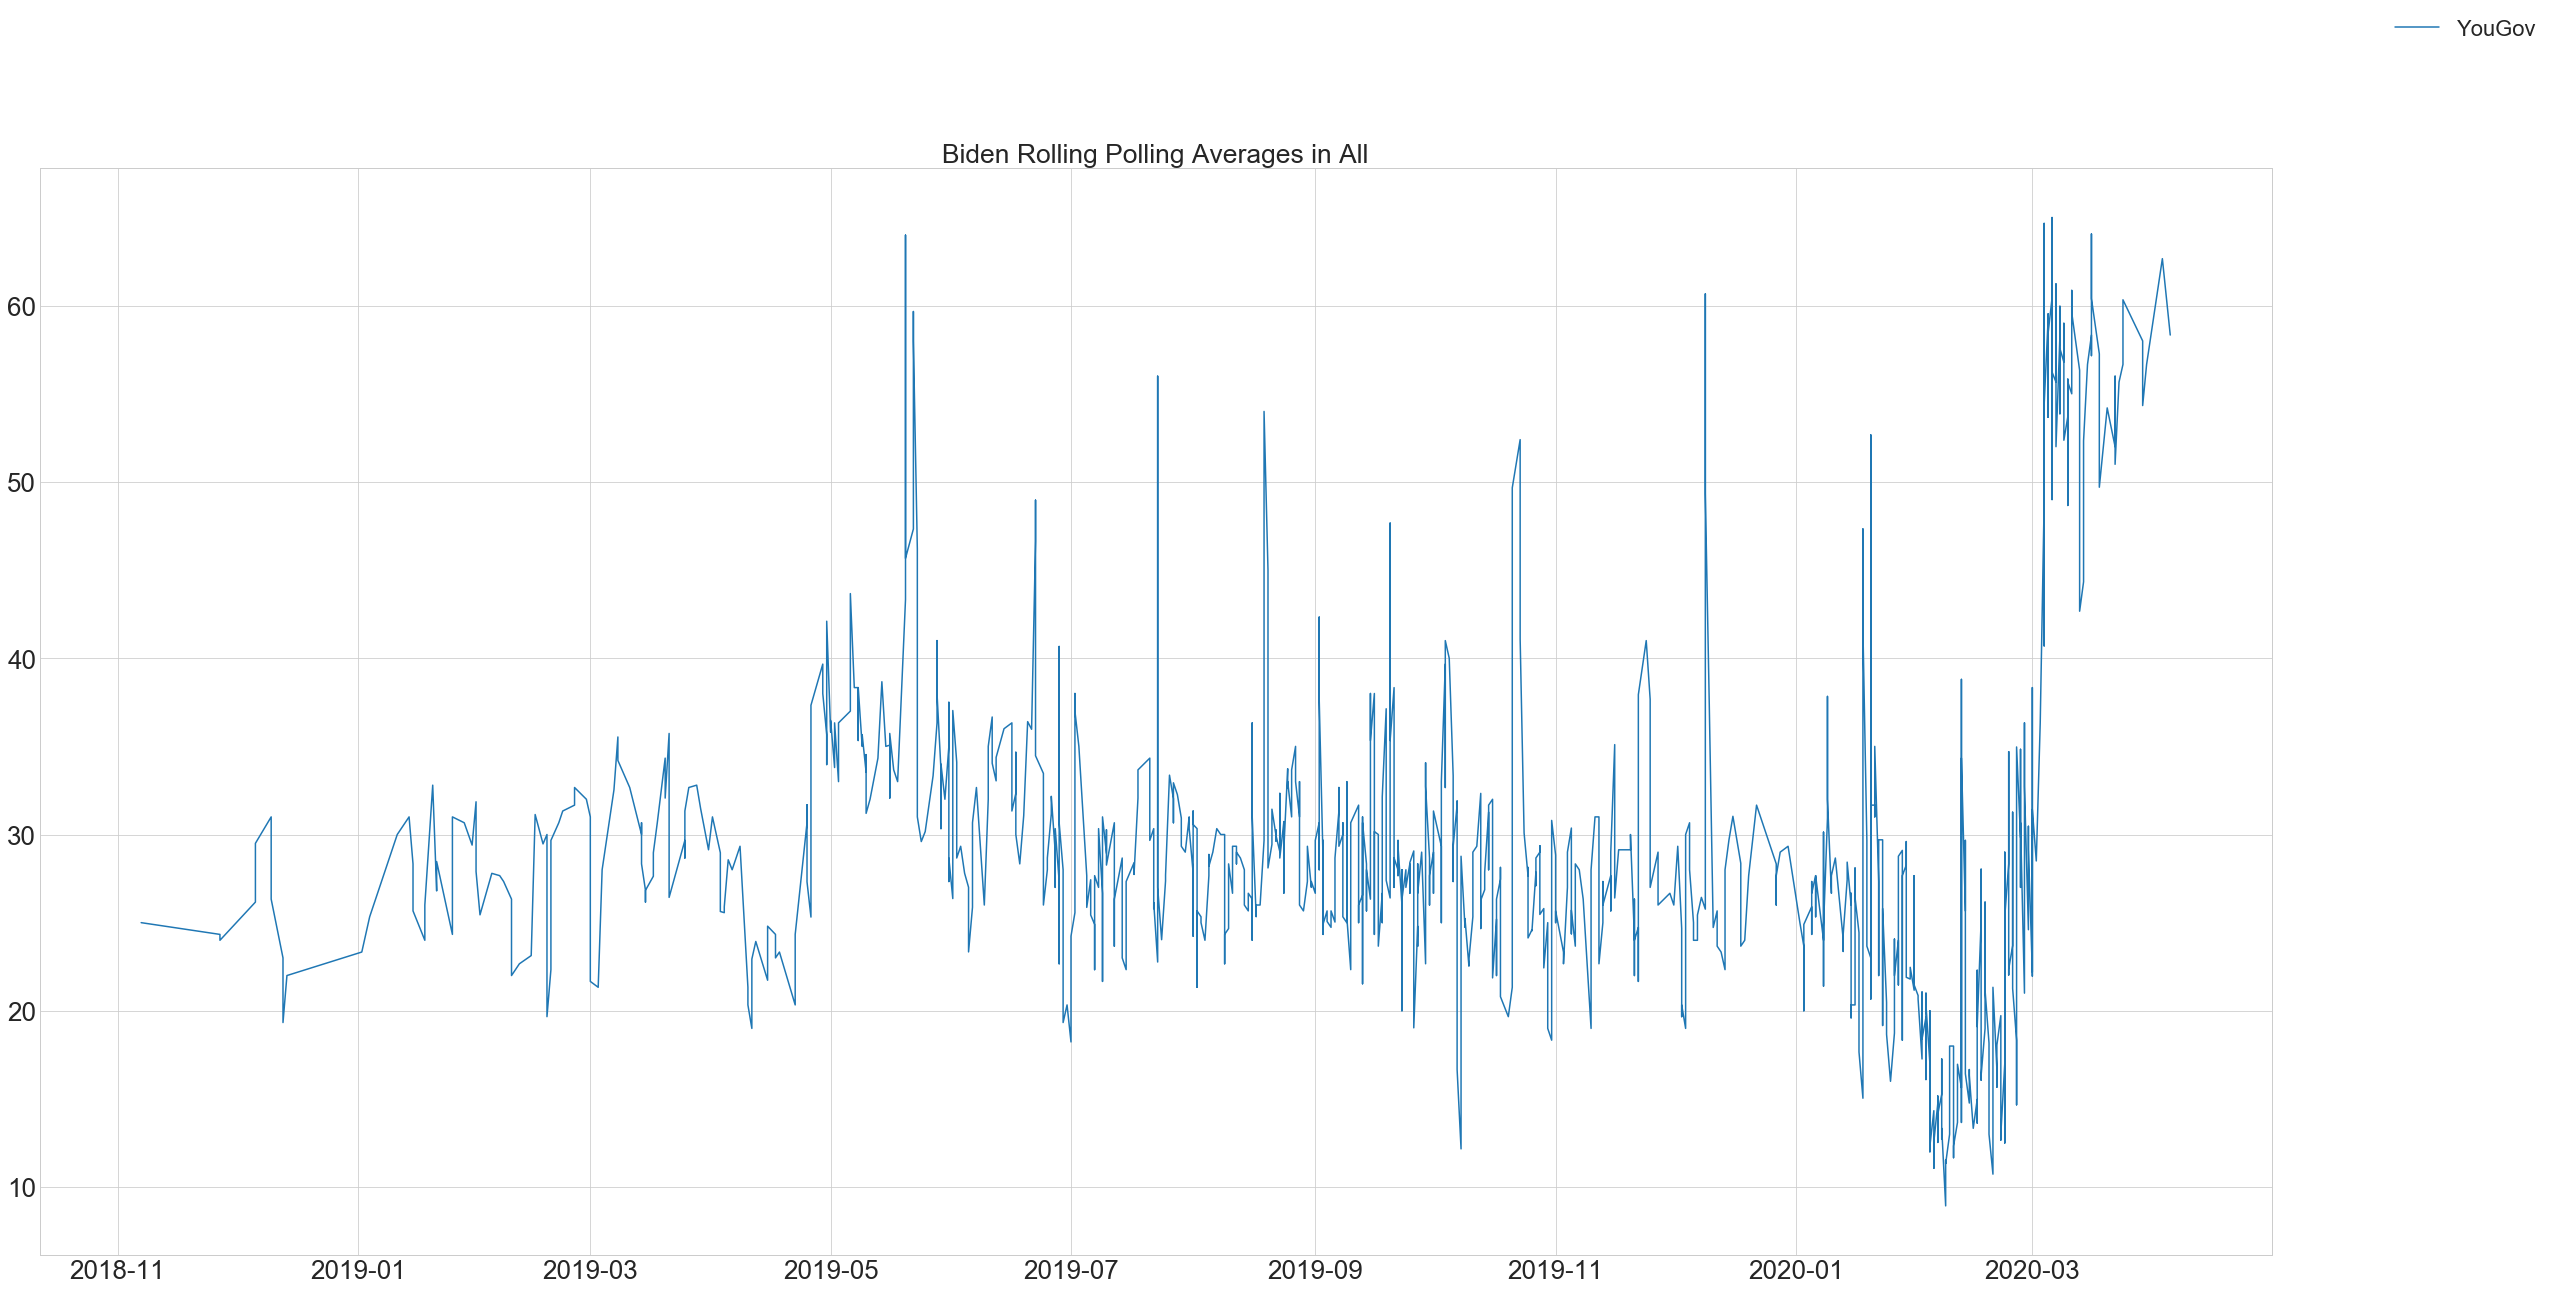

In [40]:
biden = biden.reset_index()
biden

fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["rolling_mean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Rolling Polling Averages in All")
plt.show()

In [3]:
klobuchar = pd.read_csv("data/klobuchar_full.csv")

In [3]:
klobuchar

,tweetid,date,text,favorites,retweets,location
0,678699116810117120,2015-12-20,With Senator Amy Klobuchar at her book signing...,0.0,0.0,United States
1,698744547518513152,2016-02-14,.@CharlesHubbell Amy Klobuchar will be on his ...,0.0,0.0,United States
2,699473744129961985,2016-02-16,# Amy Klobuchar,0.0,0.0,United States
3,743262404939677697,2016-06-16,"Seriously, Sen. Amy Klobuchar is making me cry...",0.0,0.0,United States
4,745699830492766208,2016-06-22,"Amy Klobuchar, @amyklobuchar is now trending i...",0.0,0.0,United States
...,...,...,...,...,...,...
3485,1235264153150820352,2020-03-04,"@The_Ghost_Rat I think Amy Klobuchar, to firm ...",0.0,0.0,United States
3486,1235287304509497346,2020-03-04,@amyklobuchar Our weary Nation thanks you \nYo...,0.0,0.0,United States
3487,1235945647259475970,2020-03-06,@BarbMcQuade @GovWhitmer @SenStabenow @RepDebD...,0.0,0.0,United States
3488,1235980075411140608,2020-03-06,Amy Klobuchar will be in GR tomorrow morning t...,0.0,0.0,United States


In [4]:
tweetPerDate = dict()

In [4]:
klobuchar['text']

0       With Senator Amy Klobuchar at her book signing...
1       .@CharlesHubbell Amy Klobuchar will be on his ...
2                                         # Amy Klobuchar
3       Seriously, Sen. Amy Klobuchar is making me cry...
4       Amy Klobuchar, @amyklobuchar is now trending i...
                              ...                        
3485    @The_Ghost_Rat I think Amy Klobuchar, to firm ...
3486    @amyklobuchar Our weary Nation thanks you \nYo...
3487    @BarbMcQuade @GovWhitmer @SenStabenow @RepDebD...
3488    Amy Klobuchar will be in GR tomorrow morning t...
3489    @BrentNYT I think Biden will pick Amy Klobucha...
Name: text, Length: 3490, dtype: object

In [15]:
klobuchar[:20]['text'][9]

'Amy Klobuchar, @amyklobuchar is now trending in #Seattle\n\nhttps://t.co/sigVIkuzfK https://t.co/yKtzbQkDkq'

In [5]:
bloombergNegTrain = pd.read_csv("data/labels/bloomberg_labels/bloomberg_neg_train.csv")

In [6]:
bloombergNegTrain

,tweetid,date,text,favorites,retweets,location,s_label
0,687151925574381568,2016-01-13,"Don't fret @CharmianNeary, Mike Bloomberg has ...",0.0,0.0,United States,-1
1,691385675913007109,2016-01-24,"https://t.co/XdH6DiqMJn - God help me, I’d vot...",0.0,0.0,United States,-1
2,696982583876284417,2016-02-09,how is mike bloomberg not the same as goldman ...,0.0,0.0,United States,-1
3,703114132736724996,2016-02-26,"Mike Bloomberg is 5'4"". WE AREN'T LIVING IN JA...",0.0,0.0,United States,-1
4,756647732857729025,2016-07-23,Caller to @marklevinshow NAILED it. Trump is M...,0.0,0.0,United States,-1
5,758475526495436800,2016-07-28,Wait they are following up dad with Mike Bloom...,0.0,0.0,United States,-1
6,778696465719754753,2016-09-21,@realDonaldTrump @DonaldJTrumpJr @KellyannePol...,0.0,0.0,United States,-1
7,821917736708218880,2017-01-19,Something really started by MIKE BLOOMBERG frm...,0.0,0.0,United States,-1
8,861736369810542592,2017-05-09,I hope this is actually true. Would hate to se...,0.0,0.0,United States,-1
9,1011977296369111040,2018-06-27,Wow Bloomberg must be writing your tweets: lik...,0.0,0.0,United States,-1


In [7]:
bloombergNeuTrain = pd.read_csv("data/labels/bloomberg_labels/bloomberg_neu_train.csv")

In [9]:
bloombergNeuTrain

,tweetid,date,text,favorites,retweets,location,s_label
0,685222562431766528,2016-01-07,#tbt That time when Cass and I played at a Mik...,0.0,0.0,United States,0
1,758480417414668288,2016-07-28,Mike Bloomberg followed byLenny Kravitz...the ...,0.0,0.0,United States,0
2,758484905655283713,2016-07-28,"Mike Bloomberg: ""I built a business, and I did...",0.0,0.0,United States,0
3,758541822297636864,2016-07-28,Huiswerk van Mike Bloomberg #DemConvention htt...,0.0,0.0,United States,0
4,759039284242448385,2016-07-29,@darth dreaming of a picture of Little Marco R...,0.0,0.0,United States,0
5,759053837051109376,2016-07-29,Billionaires brawl: Donald Trump throws Twitte...,0.0,0.0,United States,0
6,760207853072347138,2016-08-01,Donald Trump does not know Mike Bloomberg or H...,0.0,0.0,United States,0
7,766020965113466880,2016-08-17,Mike Bloomberg takes on a new role close to hi...,0.0,0.0,United States,0
8,790544927142846464,2016-10-24,.@Mike Bloomberg: government supports ppl that...,0.0,0.0,United States,0
9,796271374562168832,2016-11-09,"He most certainly did, we get what we pay for,...",0.0,0.0,United States,0


In [39]:
rolling

Rolling [window=3,center=False,axis=0]

In [41]:
rolling_mean

,question_id,poll_id,cycle,pollster_id,pollster_rating_id,sample_size,internal,tracking,nationwide_batch,candidate_id,pct
start_date_ts,,,,,,,,,,,
2018-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-07,92393.000000,57072.666667,2020.0,1057.666667,247.333333,586.000000,0.0,0.0,0.0,13256.0,25.000000
2018-11-27,92394.333333,57013.666667,2020.0,1088.333333,247.333333,612.333333,0.0,0.0,0.0,13256.0,24.333333
2018-11-27,92395.000000,57065.000000,2020.0,1194.666667,219.000000,521.000000,0.0,0.0,0.0,13256.0,24.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-29,120679.666667,65043.000000,2020.0,1019.666667,239.666667,464.000000,0.0,0.0,0.0,13256.0,54.333333
2020-03-29,120900.333333,65253.000000,2020.0,737.333333,222.666667,481.666667,0.0,0.0,0.0,13256.0,54.333333
2020-03-30,121140.666667,65469.333333,2020.0,661.666667,251.000000,4788.666667,0.0,0.0,0.0,13256.0,56.666667


In [48]:
for i in range(3, rolling_mean.pct.size):
    print(rolling_mean.pct[i]- rolling_mean.pct[i-1])

-0.6666666666666679
-0.33333333333333215
2.166666666666668
1.6666666666666643
1.6666666666666679
1.5
-0.33333333333333215
-4.333333333333336
-3.333333333333332
-3.666666666666668
2.666666666666668
1.3333333333333321
2.0
2.0
2.666666666666668
1.0
-2.666666666666668
-2.6666666666666643
-1.6666666666666679
1.3333333333333321
0.6666666666666679
6.800000000000004
-6.0000000000000036
1.6666666666666679
-4.133333333333336
6.666666666666668
-0.33333333333333215
-1.2666666666666657
2.4566666666666634
-2.6866666666666674
-1.2700000000000031
-2.456666666666667
2.3533333333333353
-0.13000000000000256
-0.33333333333333215
-1.0
-4.333333333333332
0.6666666666666643
0.466666666666665
8.0
-1.6666666666666679
0.5333333333333314
-9.333333333333332
-1.0
2.666666666666668
7.333333333333332
1.0
0.6666666666666679
0.33333333333333215
1.0
-0.6666666666666679
-1.0
-5.666666666666664
-3.666666666666668
-0.33333333333333215
6.666666666666664
4.533333333333335
3.0
-1.3333333333333357
-1.5333333333333314
-2.66666

-0.4666666666666668
-1.1333333333333329
-1.666666666666666
0.4666666666666668
1.0333333333333314
2.166666666666666
-0.3333333333333339
0.7666666666666693
-2.5
-0.13333333333333286
1.466666666666665
0.13333333333333286
1.1333333333333329
1.200000000000001
-0.1999999999999993
1.0
-4.533333333333335
4.066666666666666
-3.0000000000000018
-0.466666666666665
-4.399999999999999
1.2666666666666657
1.3333333333333321
-0.2666666666666657
0.0666666666666682
1.666666666666666
5.000000000000002
0.0
-2.0
-4.333333333333334
0.6666666666666661
1.333333333333334
2.9999999999999982
-0.36666666666666714
0.6666666666666643
-1.3333333333333321
4.333333333333336
1.6666666666666643
9.0
-2.3000000000000007
5.9999999999999964
1.3333333333333357
3.133333333333333
-6.9999999999999964
-8.0
-6.466666666666669
-1.3333333333333357
-2.333333333333332
1.333333333333334
5.366666666666665
-0.6666666666666679
2.0
3.9666666666666686
0.0
8.666666666666664
-8.666666666666664
2.0
-9.0
0.0
-1.6666666666666679
0.0
11.0
1.66666

In [49]:
sanders

NameError: name 'sanders' is not defined

In [50]:
sandersBool = fte["candidate_name"] == "Bernard Sanders"
sanders = fte[sandersBool]

In [51]:
sanders

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
1,121390,65691,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0
3,121424,65687,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,297.0,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
5,121367,65683,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,218.0,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0
7,121362,65680,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,144.0,...,False,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
9,120693,65045,2020,NaN,568,YouGov,352,Economist,YouGov,391.0,...,False,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18559,92395,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0
18567,92396,57007,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,133.0,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0
18607,92394,57181,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,391.0,...,False,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0
18611,92393,56853,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,218.0,...,False,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0


In [57]:
sanders = fte[fte["candidate_name"] == "Bernard Sanders"]
timestamps = list()
for index, row in sanders.iterrows():
    timestamps.append(pd.to_datetime(row["start_date"]))
sanders.insert(2, "start_date_ts", timestamps, True)

In [58]:
rollingSanders = sanders.rolling(window=3)
rolling_mean_sanders = rollingSanders.mean()
print(rolling_mean_sanders.head(10))
sanders["rolling_mean"] = rolling_mean_sanders["pct"]

IndexError: list assignment index out of range

In [54]:
rolling_mean_sanders.pct

1              NaN
3              NaN
5        31.333333
7        32.000000
9        33.333333
           ...    
18559    17.000000
18567    19.333333
18607    16.666667
18611    18.000000
18632    17.666667
Name: pct, Length: 1271, dtype: float64

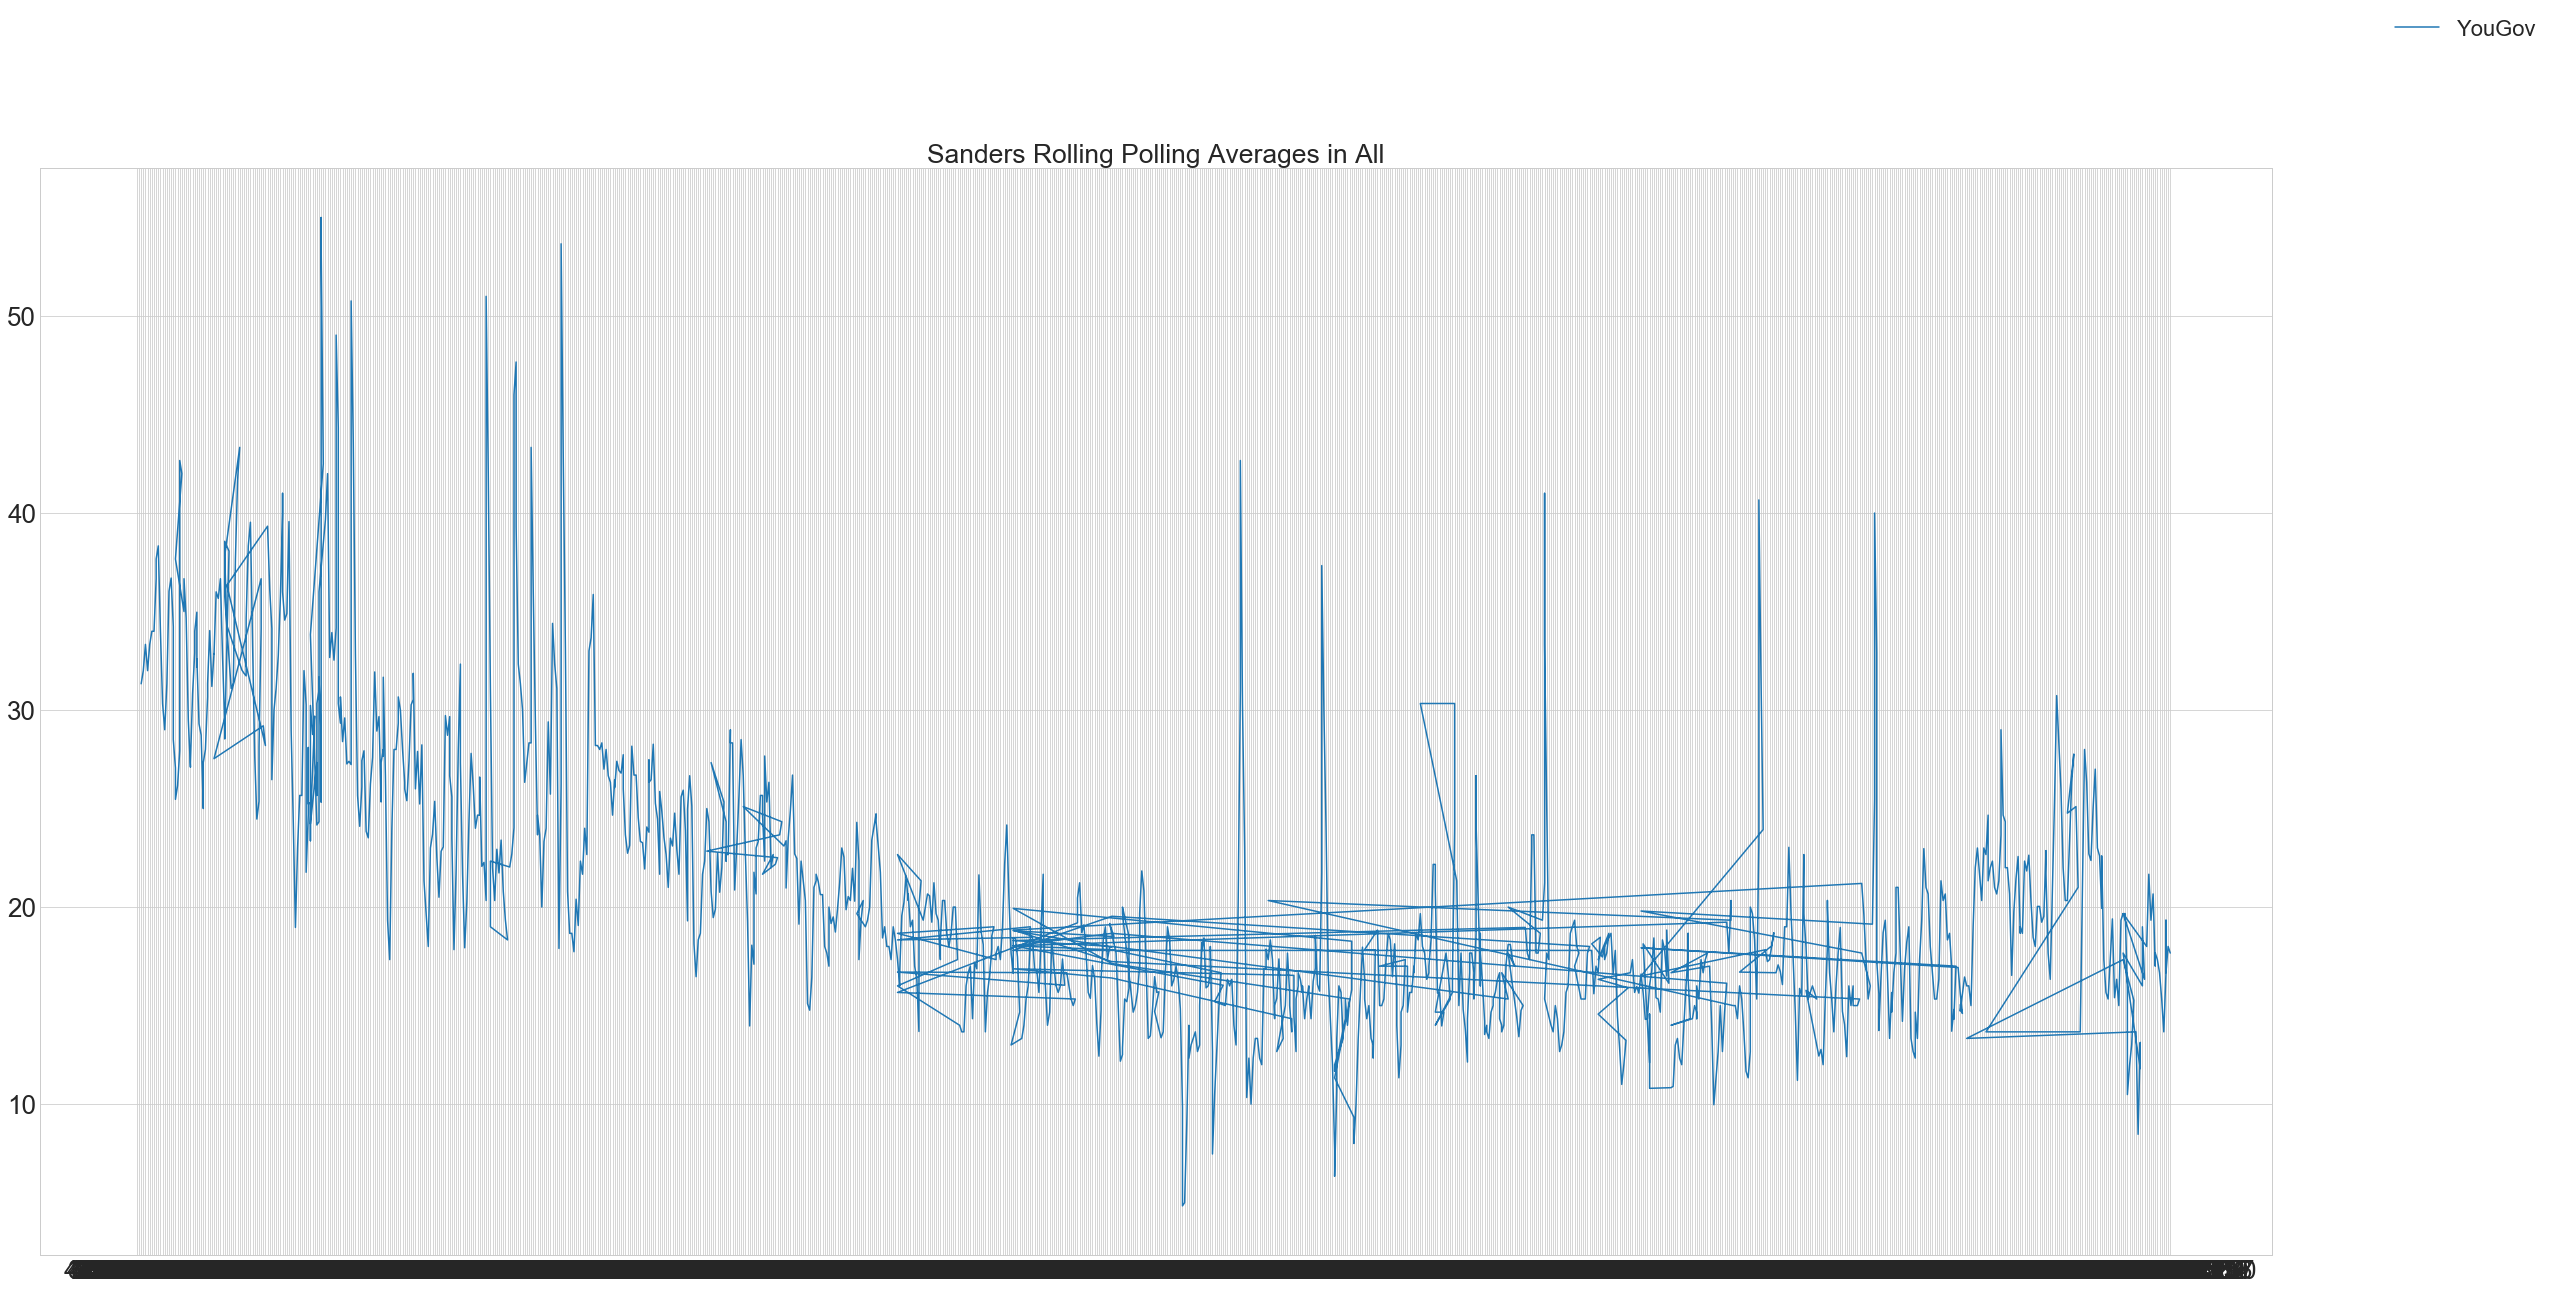

In [56]:

fig = plt.figure()
plt.rcParams.update({'font.size': 26})
plt.plot(biden["start_date_ts"], biden["rolling_mean"])
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})
fig.legend([ "YouGov","SurveyUSA", "Monmouth University", "ABC News/Washington Post", "Selzer & Co.", "Muhlenberg College", "Suffolk University"])
plt.title("Biden Rolling Polling Averages in All")
plt.show()

In [59]:
sanders

,question_id,poll_id,start_date_ts,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,nationwide_batch,created_at,notes,url,stage,party,answer,candidate_id,candidate_name,pct
1,121390,65691,2020-04-05,2020,NaN,568,YouGov,352,Economist,YouGov,...,False,4/8/20 10:02,NaN,https://docs.cdn.yougov.com/ogvntw3mu9/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,28.0
3,121424,65687,2020-04-03,2020,NaN,1361,SSRS,143,CNN,CNN/SSRS,...,False,4/9/20 11:03,NaN,https://cdn.cnn.com/cnn/2020/images/04/09/rel4...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
5,121367,65683,2020-03-30,2020,NaN,1189,Morning Consult,NaN,NaN,Morning Consult,...,False,4/7/20 06:34,NaN,https://morningconsult.com/2020-democratic-pri...,primary,DEM,Sanders,13257,Bernard Sanders,36.0
7,121362,65680,2020-03-29,2020,NaN,228,IBD/TIPP,NaN,NaN,IBD/TIPP,...,False,4/6/20 16:49,NaN,https://projects.fivethirtyeight.com/polls/202...,primary,DEM,Sanders,13257,Bernard Sanders,30.0
9,120693,65045,2020-03-29,2020,NaN,568,YouGov,352,Economist,YouGov,...,False,4/1/20 09:27,NaN,https://docs.cdn.yougov.com/p8nwhxp50n/econTab...,primary,DEM,Sanders,13257,Bernard Sanders,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18559,92395,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,15.0
18567,92396,57007,2018-11-27,2020,NaN,1508,Harris Insights & Analytics,763,Harvard,Harris Poll,...,False,12/27/18 03:58,NaN,https://harvardharrispoll.com/wp-content/uploa...,primary,DEM,Sanders,13257,Bernard Sanders,21.0
18607,92394,57181,2018-11-07,2020,Massachusetts,568,YouGov,278,UMass Amherst,YouGov,...,False,12/27/18 03:58,NaN,https://polsci.umass.edu/sites/default/files/T...,primary,DEM,Sanders,13257,Bernard Sanders,14.0
18611,92393,56853,2018-11-07,2020,NaN,1189,Morning Consult,538,Politico,Morning Consult,...,False,12/27/18 03:57,NaN,https://www.politico.com/f/?id=00000167-0956-d...,primary,DEM,Sanders,13257,Bernard Sanders,19.0


In [62]:
(sanders.start_date_ts)

1       2020-04-05
3       2020-04-03
5       2020-03-30
7       2020-03-29
9       2020-03-29
           ...    
18559   2018-11-27
18567   2018-11-27
18607   2018-11-07
18611   2018-11-07
18632   2018-11-05
Name: start_date_ts, Length: 1271, dtype: datetime64[ns]

## Getting the mean changes per week

In [ ]:
b = buttigiegFull.groupby([pd.Grouper(key='test', freq='W-MON')])['sentiment'].mean().reset_index().sort_values('test')